In [1]:
from HeaderP import *


In [2]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection



In [3]:
# from So
from os.path import exists
import io
colnames = ['oid','expid','hjd','mjd','mag','magerr','catflags','filtercode',
                     'ra','dec','chi','sharp','filefracday','field','ccdid','qid','limitmag','magzp',
                     'magzprms','clrcoeff','clrcounc','exptime','airmass','programid']
import requests
def download_ztf_archive_lightcurves(ra, dec, objids=[], sr=0.001, lcout=False):
    ra = str(ra)
    dec = str(dec)
    sr = str(sr)
    
    if exists(f"./lc/ra_{ra}_dec_{dec}_sr_{sr}.pkl"):
        mainlc = pd.read_pickle(f"./lc/ra_{ra}_dec_{dec}_sr_{sr}.pkl")
    else:
        url1 = "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE "
        url2 = f"{ra} {dec} {sr}&BANDNAME=r&NOBS_MIN=30&BAD_CATFLAGS_MASK=32768&FORMAT=ipac_table"
        url = url1 + url2


        r = requests.get(url)

        urlData = r.content

        mainlc = pd.read_table(io.StringIO(urlData.decode('utf-8')),
                              delim_whitespace=True, skiprows=54, names=colnames)
        mainlc.to_pickle(f"./lc/ra_{ra}_dec_{dec}_sr_{sr}.pkl")
    
    return mainlc

    

In [52]:
!rm ./lc/ra_75.08572391265444_dec_46.37252656126359_sr_0.001.pkl

In [53]:
download_ztf_archive_lightcurves(75.08572391265444,46.37252656126359, objids=[], sr=0.001, lcout=False)


oid      expid           hjd           mjd        mag  \
0     743205300009968   46213270  2.458217e+06  58216.132708  15.148676   
1     743205300009968   46517167  2.458220e+06  58219.171678  15.168267   
2     743205300009968   46519136  2.458220e+06  58219.191366  15.149431   
3     743205300009968   56148876  2.458316e+06  58315.488762  15.117114   
4     743205300009968   56247056  2.458317e+06  58316.470567  15.160457   
..                ...        ...           ...           ...        ...   
375  1742213300020256  103435460  2.458789e+06  58788.354606  15.152054   
376  1742213300020256  104130629  2.458796e+06  58795.306296  15.156242   
377  1742213300020256  104130674  2.458796e+06  58795.306748  15.154048   
378  1742213300020256  104427086  2.458799e+06  58798.270868  15.182957   
379  1742213300020256  104427131  2.458799e+06  58798.271319  15.145884   

       magerr  catflags filtercode         ra        dec  ...  ccdid  qid  \
0    0.011252         0         zr  75.085713  46.372526  ...      5    3   
1    0.011278         0         zr  75.085728  46.372525  ...      5    3   
2    0.011253         0         zr  75.085727  46.372498  ...      5    3   
3    0.011211         0         zr  75.085693  46.372530  ...      5    3   
4    0.011268         0         zr  75.085678  46.372548  ...      5    3   
..        ...       ...        ...        ...        ...  ...    ...  ...   
375  0.011733         0         zr  75.085699  46.372500  ...     13    3   
376  0.011736         0         zr  75.085692  46.372512  ...     13    3   
377  0.011734         0         zr  75.085745  46.372489  ...     13    3   
378  0.011758         0         zr  75.085727  46.372500  ...     13    3   
379  0.011728         0         zr  75.085712  46.372503  ...     13    3   

      limitmag      magzp  magzprms  clrcoeff  clrcounc  exptime  airmass  \
0    20.219999  26.258051  0.014331  0.098876  0.000003       30    1.366   
1    19.520000  25.918591  0.022726  0.099212  0.000007       30    1.712   
2    19.610001  26.021101  0.020837  0.094589  0.000006       30    1.935   
3    19.709999  25.882641  0.019858  0.094782  0.000005       30    1.953   
4    20.450001  25.987251  0.017741  0.082947  0.000004       30    2.186   
..         ...        ...       ...       ...       ...      ...      ...   
375  20.830000  26.175915  0.017434  0.089428  0.000004       30    1.062   
376  20.570000  26.166258  0.016315  0.087112  0.000003       30    1.120   
377  20.500000  26.153040  0.016399  0.095528  0.000003       30    1.119   
378  20.100000  26.164534  0.017945  0.080691  0.000004       30    1.202   
379  20.090000  26.153353  0.017337  0.096097  0.000004       30    1.201   

     programid  
0            1  
1            1  
2            1  
3            1  
4            1  
..         ...  
375          3  
376          2  
377          3  
378          2  
379          3  

[380 rows x 24 columns]

In [27]:
lc = download_ztf_archive_lightcurves(165.0312,21.247355,objids=[], sr=0.001, lcout=False)
lc

oid      expid           hjd           mjd        mag  \
0    573215300004402   46421487  2.458219e+06  58218.214873  14.799231   
1    573215300004402   46424251  2.458219e+06  58218.242512  14.796755   
2    573215300004402   46720436  2.458222e+06  58221.204363  14.766984   
3    573215300004402   46722703  2.458222e+06  58221.227037  14.761316   
4    573215300004402   47022417  2.458225e+06  58224.224178  14.852254   
..               ...        ...           ...           ...        ...   
203  573215300004402  175552569  2.459510e+06  59509.525694  14.785453   
204  573215300004402  175552818  2.459510e+06  59509.528183  14.776276   
205  573215300004402  175553069  2.459510e+06  59509.530694  14.788988   
206  573215300004402  175851027  2.459513e+06  59512.510278  14.789220   
207  573215300004402  176849915  2.459523e+06  59522.499155  14.839452   

       magerr  catflags filtercode          ra        dec  ...  ccdid  qid  \
0    0.012592         0         zr  165.030254  21.247212  ...     15    3   
1    0.012592         0         zr  165.030256  21.247213  ...     15    3   
2    0.012600         0         zr  165.030309  21.247297  ...     15    3   
3    0.012602         0         zr  165.030393  21.247319  ...     15    3   
4    0.012580         0         zr  165.030266  21.247213  ...     15    3   
..        ...       ...        ...         ...        ...  ...    ...  ...   
203  0.012595         0         zr  165.030128  21.247184  ...     15    3   
204  0.012598         0         zr  165.030124  21.247177  ...     15    3   
205  0.012594         0         zr  165.030120  21.247181  ...     15    3   
206  0.012594         0         zr  165.030119  21.247190  ...     15    3   
207  0.012583         0         zr  165.030119  21.247166  ...     15    3   

      limitmag      magzp  magzprms  clrcoeff  clrcounc  exptime  airmass  \
0    21.070000  26.162504  0.025096  0.109865  0.000018       30    1.041   
1    21.340000  26.190966  0.024871  0.107719  0.000017       30    1.034   
2    20.290001  25.984106  0.033336  0.137251  0.000032       30    1.042   
3    20.090000  26.037416  0.037351  0.132213  0.000041       30    1.033   
4    20.900000  25.941744  0.036277  0.109811  0.000037       30    1.034   
..         ...        ...       ...       ...       ...      ...      ...   
203  20.200001  26.255985  0.030034  0.118683  0.000025       30    1.850   
204  20.270000  26.253767  0.031225  0.120480  0.000027       30    1.814   
205  20.200001  26.268507  0.034429  0.112638  0.000033       30    1.779   
206  20.360001  26.239454  0.028382  0.114852  0.000022       30    1.968   
207  21.320000  26.268030  0.024664  0.116223  0.000017       30    1.726   

     programid  
0            1  
1            1  
2            1  
3            1  
4            1  
..         ...  
203          1  
204          1  
205          1  
206          1  
207          1  

[208 rows x 24 columns]

0.0


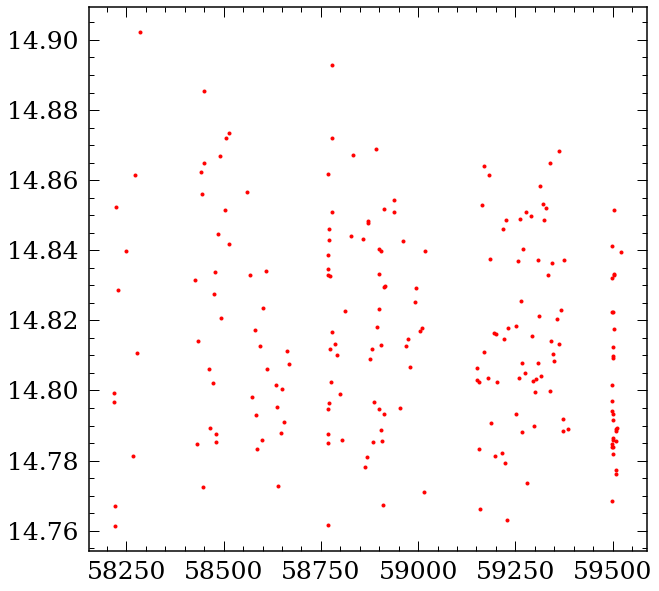

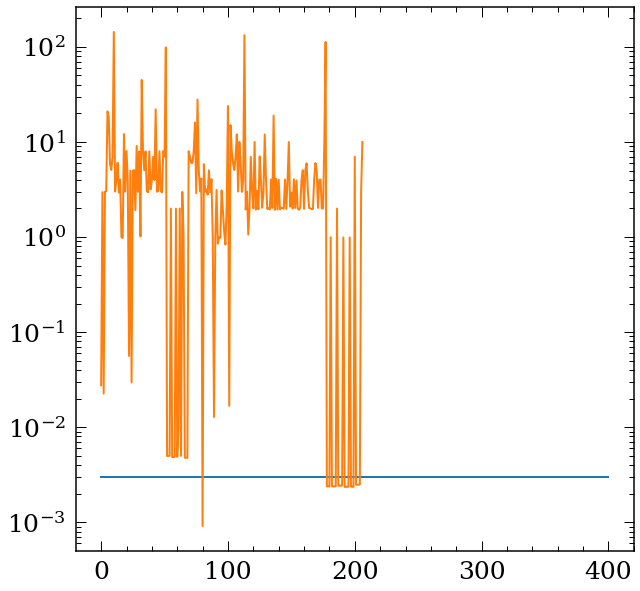

In [80]:
plt.plot(lc['mjd'],lc['mag'],'r.')
print(sum(lc.sort_values(by='mjd')['mjd']-lc['mjd']))
plt.figure()
plt.plot([0,400],[0.003,0.003])
plt.semilogy(np.diff(lc['mjd']))

In [89]:
import io
import os
from astropy.timeseries import LombScargle
import warnings
warnings.filterwarnings('ignore')

def fitpoly(t,mag):
    p = fitpoints(t,mag,2)
    return t, mag-p(t)



def movingMed_time(t, mag, T_window,delta_T_window):
    # add in two columns for the median and put Nan's in them
    t_med=np.empty(len(mag))
    mag_med=np.empty(len(mag))
    t_med[:]=np.nan
    mag_med[:]=np.nan
    
    # define the boundaries of the windows
    window_min=float(min(t))
    window_max=float(window_min+delta_T_window)
    # max time
    maxtime=max(t)
    # break when time window hits the end
    while window_max<=maxtime+T_window:
        seldf=((t>=window_min) & (t<=window_max)) # get points between the window
        
        t_med[seldf]=np.median(t[seldf]) # all values for these indices are subsituded with median time
        mag_med[seldf]=np.median(mag[seldf]) # all values for these indices are subsituded with median flux

        window_min=window_min+delta_T_window
        window_max=window_max+delta_T_window
    return t_med, mag_med

import time
def processlc(maincord, searchradius=5, magrange=1, pltorg=False, splitlc=True, autls=True,
             protmeas=np.linspace(1,200,500),savefigname=[],falarm=False):
    # search radius is arcmin
    colnames = ['oid','expid','hjd','mjd','mag','magerr','catflags','filtercode',
                     'ra','dec','chi','sharp','filefracday','field','ccdid','qid','limitmag','magzp',
                     'magzprms','clrcoeff','clrcounc','exptime','airmass','programid']
    
    t1 = time.perf_counter()
    mainlc = download_ztf_archive_lightcurves(maincord[0], maincord[1], sr=0.001, lcout=True)
    mainlc = mainlc.loc[mainlc['oid']==mainlc['oid'][0]].reset_index(drop=True)
    mainlc = mainlc.dropna(subset=['mjd','mag','magerr']).reset_index(drop=True)
    ######### quality flags below this line #########
    mainlc = mainlc.loc[mainlc['airmass']<1.8].reset_index(drop=True)
    mainlc = mainlc.loc[mainlc['limitmag']>19.5].reset_index(drop=True)
    ######### quality flags above this line #########
    mainlc = mainlc[['oid','mjd','mag','magerr']]
    mainlc = mainlc.sort_values(by='mjd').reset_index(drop=True)
    
    
    lcs = download_ztf_archive_lightcurves(maincord[0], maincord[1], sr=searchradius/60, lcout=True)
    lcs = lcs.dropna(subset=['mjd','mag','magerr']).reset_index(drop=True)
    ######### quality flags below this line #########
    lcs = lcs.loc[lcs['airmass']<1.8].reset_index(drop=True)
    lcs = lcs.loc[lcs['limitmag']>19.5].reset_index(drop=True)
    ######### quality flags above this line #########
    lcs = lcs[['oid','mjd','mag','magerr']]
    t2 = time.perf_counter()
    
    nearlcs = lcs.loc[~lcs['oid'].isin(mainlc['oid'].unique())].reset_index(drop=True)
    m = abs(nearlcs['mag']-np.median(mainlc['mag']))<magrange
    nearlcs = nearlcs[m].reset_index(drop=True)
    nearlc_ids = nearlcs['oid'].unique()
    nearbylcs_no = len(nearlc_ids)
    #print('There are nearby %d lcs...'%(nearbylcs_no))
    
    mags = nearlcs['mag']
    for i in trange(nearbylcs_no):
        m = (nearlcs['oid'] == nearlc_ids[i])
        mags[m] = mags[m]-np.median(mags[m])
        
    nearlcs['mag'] = mags
    
    lctime = mainlc['mjd'].values-min(mainlc['mjd'].values)
    lcmags = mainlc['mag'].values
    lcmags_err = mainlc['magerr'].values
    
    
    if pltorg:
        print('LG orginal lcs...')
        plt.figure(figsize=(30,16))
        plt.subplot(2,3,1)
        plt.plot(lctime, lcmags, 'ro', markersize=10, label='pre process')
        plt.xlabel('Time [days]')
        plt.ylabel('Magnitude')
        plt.ylim([min(lcmags),max(lcmags)])
        plt.gca().invert_yaxis()
        plt.title('Origenal lc',fontsize=25)
        
        
        if autls:
            frequency, power = LombScargle(lctime * u.day, lcmags * u.mag, 
                                       lcmags_err * u.mag).autopower()
            prots = 1/frequency
            
        else:
            prots = protmeas*u.day
            frequency = 1/prots
            power = LombScargle(lctime * u.day, lcmags * u.mag, 
                                       lcmags_err * u.mag).power(frequency)
        best_frequency = frequency[np.argmax(power)]
        medpower_org = np.median(power)
        
        plt.subplot(2,3,2)
        P = 1/best_frequency
        t_fold=(lctime-np.median(lctime))-np.round((lctime-np.median(lctime))/P.value)*P.value
        plt.plot(t_fold,  lcmags, 'ko', markersize=10)   
        t_fold, mag = zip(*sorted(zip(t_fold, lcmags)))
        plt.xlabel('Period [Day]')
        plt.ylabel('Power')
        plt.tight_layout()
        plt.ylim([min(lcmags),max(lcmags)])
        plt.title('Prot = %.2f days'%(P.value), fontsize=25)
        plt.gca().invert_yaxis()
        
        plt.subplot(2,3,3)
        plt.semilogx(1/frequency, power, 'k-')   
        plt.xlim(1,200)
        plt.xlabel('Period [Day]')
        plt.ylabel('Power')
        plt.ylim([0,max(power)])
        plt.title('(ra, dec) = ('+str(maincord[0])+', '+str(maincord[1])+')',fontsize=25)
        plt.tight_layout()       
    else:
        if autls:
            frequency, power = LombScargle(lctime * u.day, lcmags * u.mag, 
                                       lcmags_err * u.mag).autopower()
            prots = 1/frequency
            
        else:
            prots = protmeas*u.day
            frequency = 1/prots
            power = LombScargle(lctime * u.day, lcmags * u.mag, 
                                       lcmags_err * u.mag).power(frequency)
        best_frequency = frequency[np.argmax(power)]
        medpower_org = np.median(power)
        
    """
    timediff = np.append([0], np.diff(lctime))
    m = (timediff>0.003)|(timediff==0)
    lctime, lcmags, lcmags_err = lctime[m], lcmags[m], lcmags_err[m]
    """
    timediff = np.append([0], np.diff(lctime))
    if splitlc:
        splits_m = (timediff>80)
        numb_splits = int(sum(splits_m))
        splittimes = lctime[splits_m]
        #print('splitting into %d lcs...'%(numb_splits+1))
        if (numb_splits)==0:
            #print('no lc to split...')
            splitlc=False
        
    
    lcmags = lcmags-np.median(lcmags)
     
    nearlc_time = nearlcs['mjd'].values-min(mainlc['mjd'].values)
    nearlc_mag = nearlcs['mag'].values
    
    lcmags_new = np.zeros(len(lctime))
    for i in range(len(lctime)):
        m = (nearlc_time == lctime[i])
        if sum(m)==0:
            lcmags_new[i] = lcmags[i]
        else:
            lcmags_new[i] = lcmags[i]-np.median(nearlc_mag[m])
    lcmags_new = lcmags_new-np.median(lcmags_new)
    
    if splitlc:
        lctime_sing, lcmags_sing, lcmags_err_sing = [], [], []
        for i in range(-1, numb_splits+1):
            if i==0:
                msplit = (lctime<splittimes[0])
            elif i==(numb_splits):
                msplit = (lctime>=splittimes[i-1])
            elif i==-1:
                msplit = (lctime>0)
            else:
                msplit = (lctime>=splittimes[i-1])&(lctime<splittimes[i])

            
            if sum(msplit)<30:
                continue
            # split into single season + overall ones
            lctime_sing1, lcmags_new_sing1, lcmags_err_sing1 = lctime[msplit], lcmags_new[msplit], lcmags_err[msplit]
            
            # get rid of outliers
            good_ind = abs(lcmags_new_sing1-np.median(lcmags_new_sing1))<3*np.std(lcmags_new_sing1)
            lctime_sing1, lcmags_new_sing1, lcmags_err_sing1 = lctime_sing1[good_ind], lcmags_new_sing1[good_ind], lcmags_err_sing1[good_ind]
            
            # 
            lctime_sing.append(lctime_sing1)
            lcmags_sing.append(lcmags_new_sing1-np.median(lcmags_new_sing1)) 
            lcmags_err_sing.append(lcmags_err_sing1)
        #print('splitting into %d lcs...'%(len(lctime_sing)))
            
    else:
        lctime_sing, lcmags_sing, lcmags_err_sing = [], [], []
        good_ind = abs(lcmags_new-np.median(lcmags_new))<3*np.std(lcmags_new)
        lctime_sing.append(lctime[good_ind])
        lcmags_sing.append(lcmags_new[good_ind]-np.median(lcmags_new[good_ind])) 
        lcmags_err_sing.append(lcmags_err[good_ind])
        
        
    if pltorg:
        #print('LG post processed lcs...')
        plt.subplot(2,3,4)
        minyylim = 100
        maxylim = -100
        for i in range(len(lctime_sing)):
            plt.plot(lctime_sing[i], lcmags_sing[i], 'o', markersize=10)
            plt.xlabel('Time [days]')
            plt.ylabel('normaized magnitude (post)')
            minyylim = min([minyylim, min(lcmags_sing[i])])
            maxylim = max([maxylim, max(lcmags_sing[i])])
        plt.ylim([minyylim, maxylim])
        plt.gca().invert_yaxis()
        plt.title('Processed lc',fontsize=25)
        
        plt.subplot(2,3,5)
        frequency, power, bestfreq, bestpower, Ps, medpower,fa = [], [], [], [], [], [],[]
        minyylim = 100
        maxylim = -100
        for i in range(len(lctime_sing)):
            ls = LombScargle(lctime_sing[i] * u.day, lcmags_sing[i] * u.mag, 
                                           lcmags_err_sing[i] * u.mag)
            if autls:
                timerange = 1/((max(lctime_sing[i])-min(lctime_sing[i]))/2)
                frequency_1, power_1 = ls.autopower(minimum_frequency=timerange*1/u.day)
                prots = 1/frequency_1

            else:
                prots = protmeas*u.day
                frequency_1 = 1/prots
                power_1 = ls.power(frequency_1)
            best_frequency_1 = frequency_1[np.argmax(power_1)]
            
            P = 1/best_frequency_1
            
            Ps.append(P)
            bestfreq.append(best_frequency_1)
            frequency.append(frequency_1)
            power.append(power_1)
            bestpower.append(max(power_1))
            medpower.append(np.median(power_1))
            fa.append(ls.false_alarm_probability(max(power_1)))
            
            t_fold=(lctime_sing[i]-np.median(lctime_sing[i]))-np.round((lctime_sing[i]-np.median(lctime_sing[i]))/P.value)*P.value
            plt.plot(t_fold/(max(t_fold)-min(t_fold)),  lcmags_sing[i]+0.1*i, 'o', label='Prot=%.2f'%P.value, markersize=10)   
            minyylim = min([minyylim, min(lcmags_sing[i]+0.1*i)])
            maxylim = max([maxylim, max(lcmags_sing[i]+0.1*i)])
            plt.xlabel('Normalized Time [Day]')
            plt.ylabel('Power')
            plt.tight_layout()
            
        
        plt.legend()
        plt.ylim([minyylim-0.05,maxylim+0.05])
        plt.gca().invert_yaxis()
        
        
        plt.subplot(2,3,6)
        maxpower = 0
        for i in range(len(lctime_sing)):
            plt.semilogx(1/frequency[i], power[i], '-')   
            plt.xlim(0,200)
            plt.xlabel('Period [Day]')
            plt.ylabel('Power')
            maxpower = max([maxpower, max(power[i])])
        plt.ylim([0,maxpower])
        plt.title('(ra, dec) = ('+str(maincord[0])+', '+str(maincord[1])+')',fontsize=25)
        plt.tight_layout()
        if len(savefigname)!=0:
            plt.savefig(savefigname)
            plt.close()
        
        
    else:
        frequency, power, bestfreq, bestpower, Ps, medpower, fa = [], [], [], [], [], [], []
        for i in range(len(lctime_sing)):
            ls = LombScargle(lctime_sing[i] * u.day, lcmags_sing[i] * u.mag, 
                                           lcmags_err_sing[i] * u.mag)
            
            if autls:
                frequency_1, power_1 = ls.autopower(minimum_frequency=0.005*1/u.day)
                prots = 1/frequency_1
                

            else:
                prots = protmeas*u.day
                frequency_1 = 1/prots
                power_1 = ls.power(frequency_1)
                
            best_frequency_1 = frequency_1[np.argmax(power_1)]
            
            P = 1/best_frequency_1
            
            Ps.append(P)
            bestfreq.append(best_frequency_1)
            frequency.append(frequency_1)
            power.append(power_1)
            bestpower.append(max(power_1))
            medpower.append(np.median(power_1))
            fa.append(ls.false_alarm_probability(power_1))
            
            t_fold=(lctime_sing[i]-np.median(lctime_sing[i]))-np.round((lctime_sing[i]-np.median(lctime_sing[i]))/P.value)*P.value
            t_fold, mag = zip(*sorted(zip(t_fold, lcmags_sing[i])))
            
        
    t3 = time.perf_counter()
    
    if falarm:
        return lctime, lcmags, [i.value for i in Ps], [i.value for i in bestpower], medpower_org, [i.value for i in medpower], [i.value for i in fa], t2-t1, t3-t2, nearbylcs_no

    else:
        return lctime, lcmags, [i.value for i in Ps], [i.value for i in bestpower], medpower_org, [i.value for i in medpower], t2-t1, t3-t2, nearbylcs_no

 
        
    



100%|██████████| 16/16 [00:00<00:00, 641.53it/s]


LG orginal lcs...


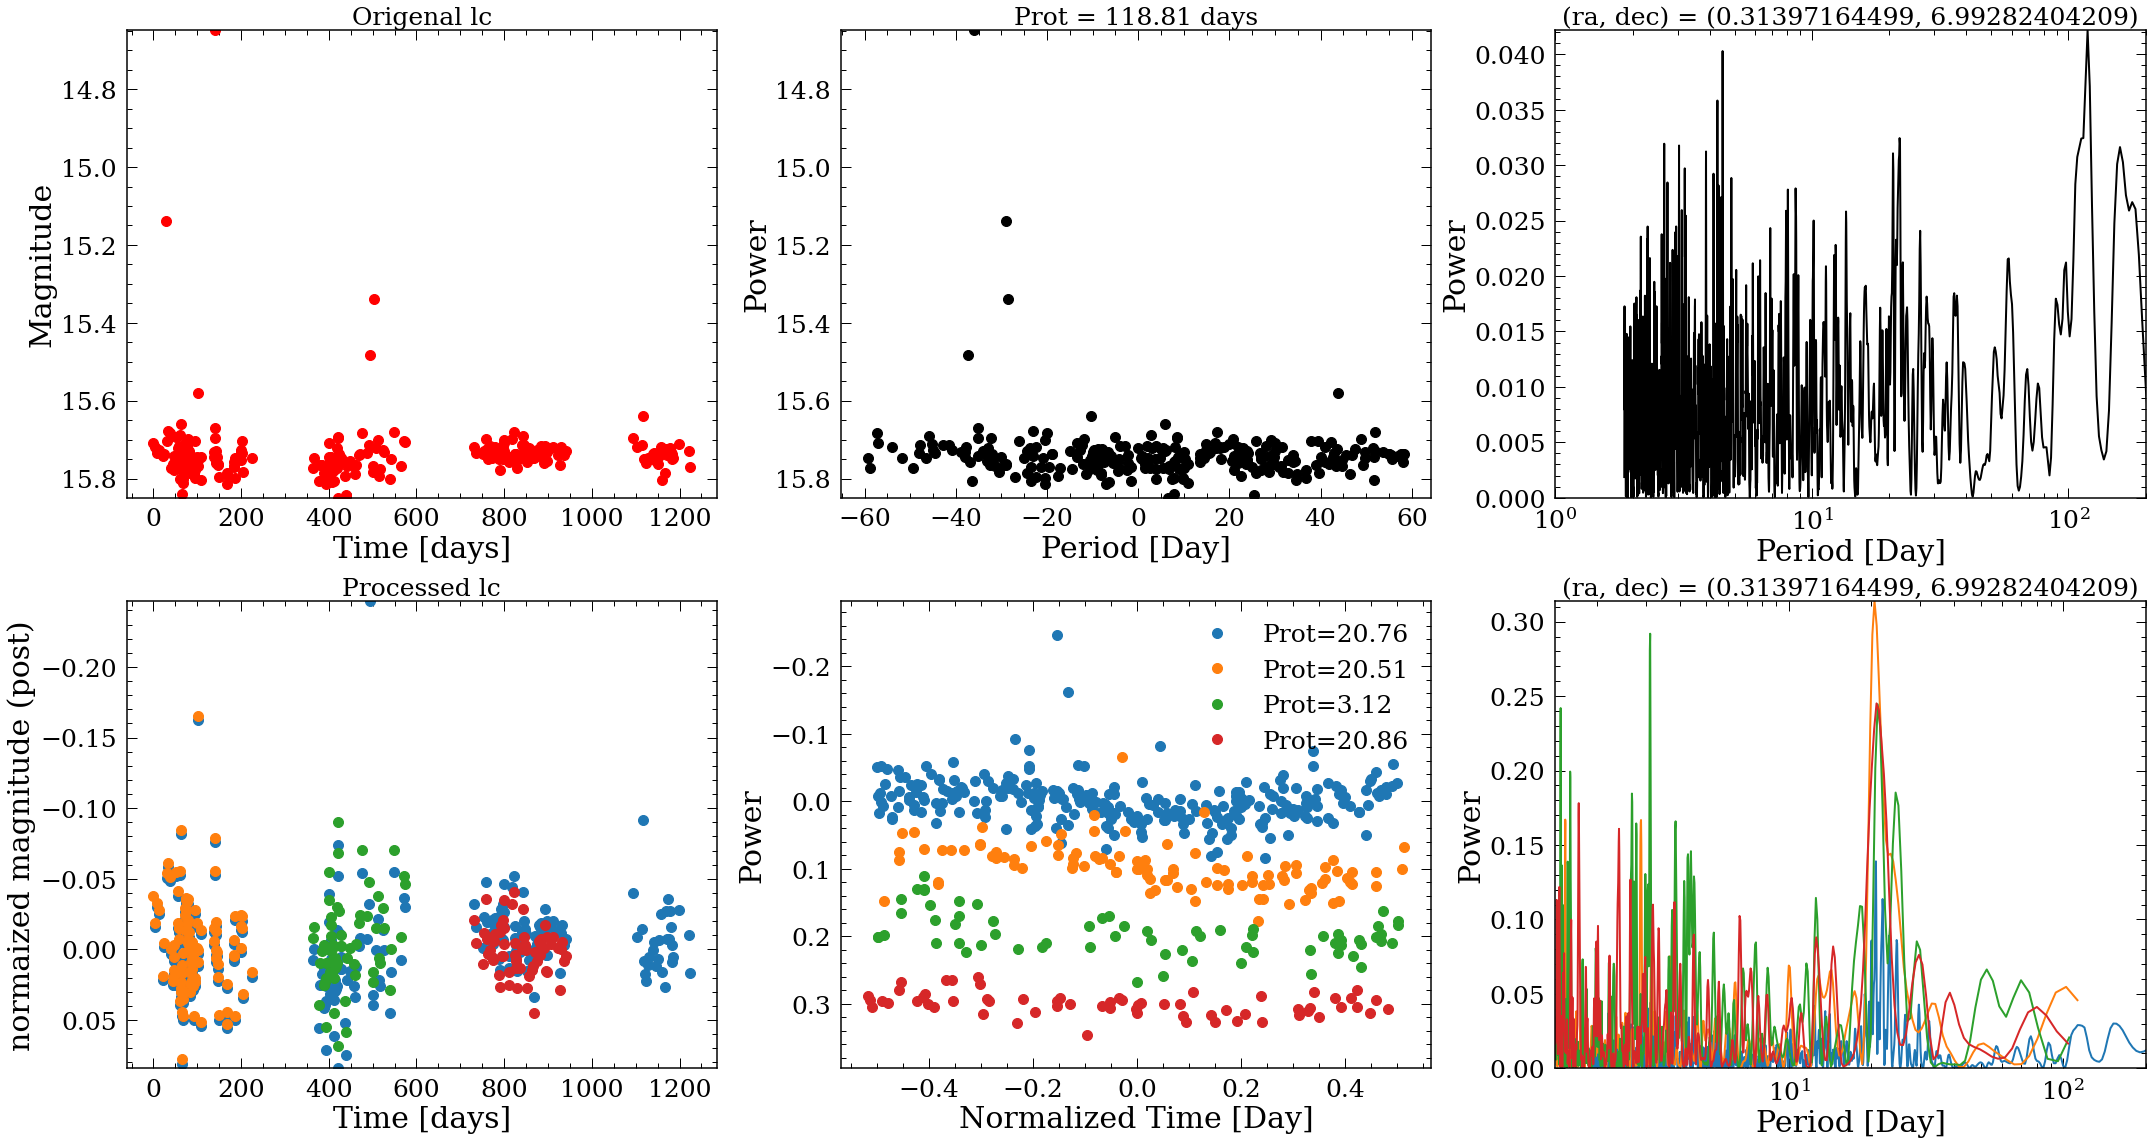

In [60]:
t, mag, p, bp, medporg, medpowers, t1, t2, nl = processlc([0.31397164499,6.99282404209], searchradius=4, magrange=2, pltorg=True, splitlc=True, autls=True)
    

100%|██████████| 2/2 [00:00<00:00, 279.37it/s]


LG orginal lcs...


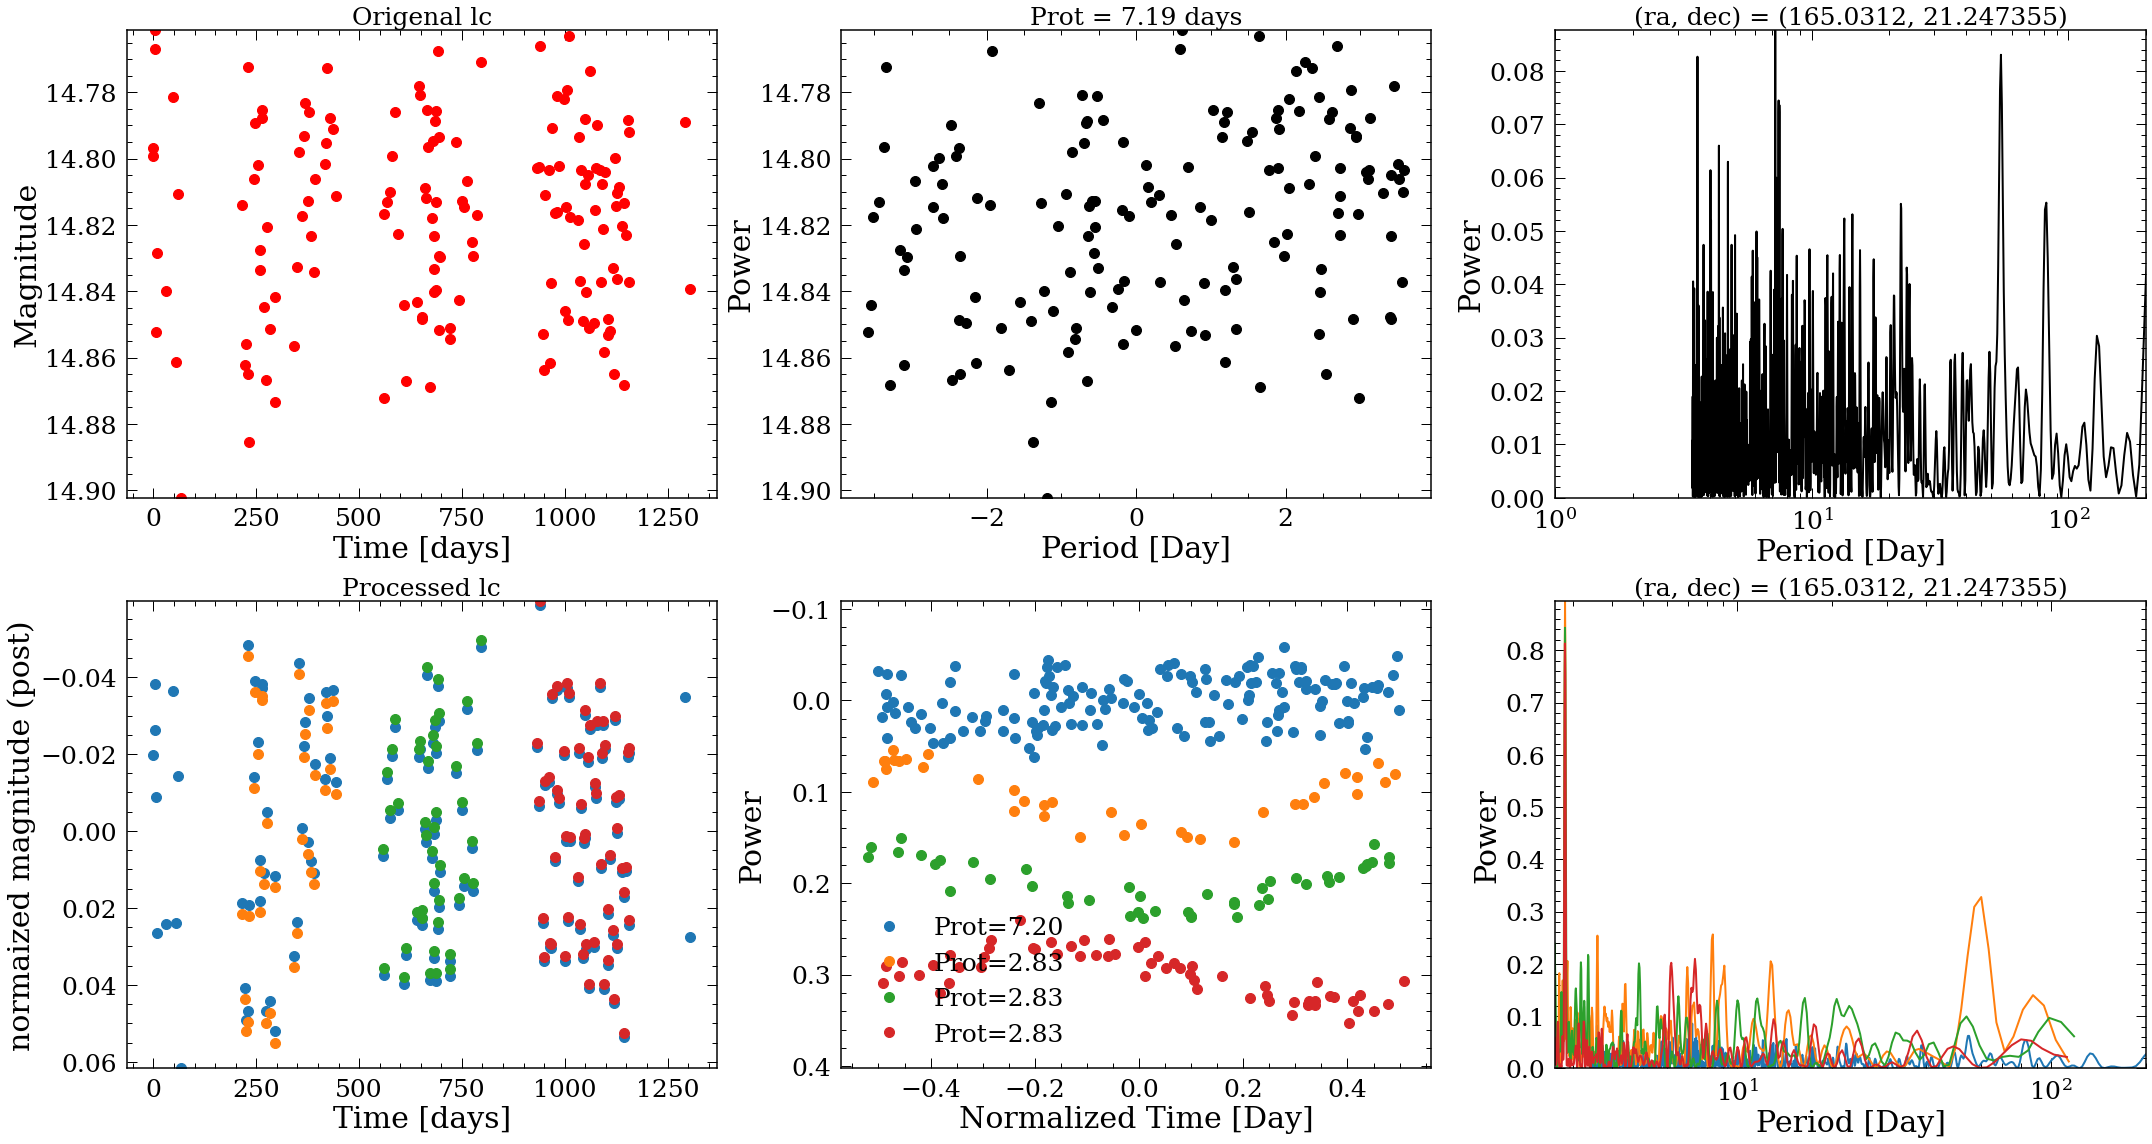

In [90]:
t, mag, p, bp, medporg, medpowers, fa, t1, t2, nl = processlc([165.0312,21.247355], searchradius=4, magrange=2, pltorg=True, splitlc=True, autls=True,falarm=True)
    

In [62]:
radec = pd.read_csv('MEarth_Rotator_List_v2.csv')
len(radec)

387

# get gaia mag

In [63]:
from astroquery.gaia import Gaia
radius = u.Quantity(0.003, u.deg)
ids = radec['2MASS'].values
Gaia.ROW_LIMIT = 1
mags = np.zeros(len(radec))*np.nan
for i in trange(len(radec)):
    star_name = "2MASS "+ids[i]
    c = SkyCoord.from_name(star_name, frame='icrs')
    j = Gaia.cone_search_async(c, radius)
    r = j.get_results()
    try:
        mags[i] = r['phot_g_mean_mag'].value.data[0]
    except:
        continue

  0%|          | 1/387 [00:04<27:38,  4.30s/it]

INFO: Query finished. [astroquery.utils.tap.core]


  1%|          | 2/387 [00:07<23:01,  3.59s/it]

INFO: Query finished. [astroquery.utils.tap.core]


  1%|          | 3/387 [00:11<23:15,  3.63s/it]

INFO: Query finished. [astroquery.utils.tap.core]


  1%|          | 4/387 [00:14<21:50,  3.42s/it]

INFO: Query finished. [astroquery.utils.tap.core]


  1%|▏         | 5/387 [00:15<16:58,  2.67s/it]

INFO: Query finished. [astroquery.utils.tap.core]


  2%|▏         | 6/387 [00:18<16:54,  2.66s/it]

INFO: Query finished. [astroquery.utils.tap.core]


  2%|▏         | 7/387 [00:20<17:07,  2.70s/it]

INFO: Query finished. [astroquery.utils.tap.core]


  2%|▏         | 8/387 [00:22<14:18,  2.27s/it]

INFO: Query finished. [astroquery.utils.tap.core]


  2%|▏         | 9/387 [00:24<15:09,  2.41s/it]

INFO: Query finished. [astroquery.utils.tap.core]


  3%|▎         | 10/387 [00:26<13:01,  2.07s/it]

INFO: Query finished. [astroquery.utils.tap.core]


  3%|▎         | 11/387 [00:28<14:03,  2.24s/it]

INFO: Query finished. [astroquery.utils.tap.core]


  3%|▎         | 12/387 [00:31<15:05,  2.42s/it]

INFO: Query finished. [astroquery.utils.tap.core]


  3%|▎         | 13/387 [00:34<15:35,  2.50s/it]

INFO: Query finished. [astroquery.utils.tap.core]


  4%|▎         | 14/387 [00:37<15:55,  2.56s/it]

INFO: Query finished. [astroquery.utils.tap.core]


  4%|▍         | 15/387 [00:39<16:07,  2.60s/it]

INFO: Query finished. [astroquery.utils.tap.core]


  4%|▍         | 16/387 [00:43<18:20,  2.97s/it]

INFO: Query finished. [astroquery.utils.tap.core]


  4%|▍         | 17/387 [00:44<15:15,  2.48s/it]

INFO: Query finished. [astroquery.utils.tap.core]


  5%|▍         | 18/387 [00:47<15:46,  2.57s/it]

INFO: Query finished. [astroquery.utils.tap.core]


  5%|▍         | 19/387 [00:51<17:50,  2.91s/it]

INFO: Query finished. [astroquery.utils.tap.core]


  5%|▌         | 20/387 [00:55<19:03,  3.12s/it]

INFO: Query finished. [astroquery.utils.tap.core]


  5%|▌         | 21/387 [00:57<18:10,  2.98s/it]

INFO: Query finished. [astroquery.utils.tap.core]


  6%|▌         | 22/387 [01:01<19:18,  3.17s/it]

INFO: Query finished. [astroquery.utils.tap.core]


  6%|▌         | 23/387 [01:04<18:20,  3.02s/it]

INFO: Query finished. [astroquery.utils.tap.core]


  6%|▌         | 24/387 [01:06<17:43,  2.93s/it]

INFO: Query finished. [astroquery.utils.tap.core]


  6%|▋         | 25/387 [01:11<20:17,  3.36s/it]

INFO: Query finished. [astroquery.utils.tap.core]


  7%|▋         | 26/387 [01:13<19:08,  3.18s/it]

INFO: Query finished. [astroquery.utils.tap.core]


  7%|▋         | 27/387 [01:16<18:37,  3.10s/it]

INFO: Query finished. [astroquery.utils.tap.core]


  7%|▋         | 28/387 [01:18<15:23,  2.57s/it]

INFO: Query finished. [astroquery.utils.tap.core]


  7%|▋         | 29/387 [01:23<19:38,  3.29s/it]

INFO: Query finished. [astroquery.utils.tap.core]


  8%|▊         | 30/387 [01:25<18:52,  3.17s/it]

INFO: Query finished. [astroquery.utils.tap.core]


  8%|▊         | 31/387 [01:27<15:32,  2.62s/it]

INFO: Query finished. [astroquery.utils.tap.core]


  8%|▊         | 32/387 [01:28<13:12,  2.23s/it]

INFO: Query finished. [astroquery.utils.tap.core]


  9%|▊         | 33/387 [01:32<15:38,  2.65s/it]

INFO: Query finished. [astroquery.utils.tap.core]


  9%|▉         | 34/387 [01:34<15:36,  2.65s/it]

INFO: Query finished. [astroquery.utils.tap.core]


  9%|▉         | 35/387 [01:38<17:36,  3.00s/it]

INFO: Query finished. [astroquery.utils.tap.core]


  9%|▉         | 36/387 [01:41<17:53,  3.06s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 10%|▉         | 37/387 [01:43<14:48,  2.54s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 10%|▉         | 38/387 [01:47<16:56,  2.91s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 10%|█         | 39/387 [01:49<16:29,  2.84s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 10%|█         | 40/387 [01:51<13:49,  2.39s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 11%|█         | 41/387 [01:52<11:57,  2.07s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 11%|█         | 42/387 [01:53<10:39,  1.85s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 11%|█         | 43/387 [01:56<11:54,  2.08s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 11%|█▏        | 44/387 [01:57<10:35,  1.85s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 12%|█▏        | 45/387 [01:59<09:42,  1.70s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 12%|█▏        | 46/387 [02:01<11:33,  2.03s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 12%|█▏        | 47/387 [02:03<10:19,  1.82s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 12%|█▏        | 48/387 [02:05<11:44,  2.08s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 13%|█▎        | 49/387 [02:08<12:48,  2.27s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 13%|█▎        | 50/387 [02:11<14:18,  2.55s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 13%|█▎        | 51/387 [02:14<15:19,  2.74s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 13%|█▎        | 52/387 [02:18<16:13,  2.91s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 14%|█▎        | 53/387 [02:19<13:32,  2.43s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 14%|█▍        | 54/387 [02:22<14:04,  2.54s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 14%|█▍        | 55/387 [02:25<14:19,  2.59s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 14%|█▍        | 56/387 [02:26<12:14,  2.22s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 15%|█▍        | 57/387 [02:29<13:14,  2.41s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 15%|█▍        | 58/387 [02:32<14:19,  2.61s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 15%|█▌        | 59/387 [02:33<12:10,  2.23s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 16%|█▌        | 60/387 [02:36<12:50,  2.36s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 16%|█▌        | 61/387 [02:39<13:51,  2.55s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 16%|█▌        | 62/387 [02:40<12:03,  2.23s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 16%|█▋        | 63/387 [02:43<12:51,  2.38s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 17%|█▋        | 64/387 [02:46<13:18,  2.47s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 17%|█▋        | 65/387 [02:48<13:38,  2.54s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 17%|█▋        | 66/387 [02:50<11:39,  2.18s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 17%|█▋        | 67/387 [02:53<12:43,  2.39s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 18%|█▊        | 68/387 [02:56<14:02,  2.64s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 18%|█▊        | 69/387 [02:59<15:29,  2.92s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 18%|█▊        | 70/387 [03:02<15:04,  2.85s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 18%|█▊        | 71/387 [03:05<14:54,  2.83s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 19%|█▊        | 72/387 [03:06<12:30,  2.38s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 19%|█▉        | 73/387 [03:09<12:57,  2.48s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 19%|█▉        | 74/387 [03:12<13:32,  2.60s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 19%|█▉        | 75/387 [03:13<11:31,  2.22s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 20%|█▉        | 76/387 [03:16<12:12,  2.36s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 20%|█▉        | 77/387 [03:19<13:09,  2.55s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 20%|██        | 78/387 [03:20<11:14,  2.18s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 20%|██        | 79/387 [03:22<09:53,  1.93s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 21%|██        | 80/387 [03:23<08:57,  1.75s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 21%|██        | 81/387 [03:27<11:55,  2.34s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 21%|██        | 82/387 [03:28<10:21,  2.04s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 21%|██▏       | 83/387 [03:29<09:18,  1.84s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 22%|██▏       | 84/387 [03:31<08:32,  1.69s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 22%|██▏       | 85/387 [03:32<08:17,  1.65s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 22%|██▏       | 86/387 [03:35<10:00,  2.00s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 22%|██▏       | 87/387 [03:38<11:28,  2.29s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 23%|██▎       | 88/387 [03:39<10:03,  2.02s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 23%|██▎       | 89/387 [03:43<12:28,  2.51s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 23%|██▎       | 90/387 [03:47<14:10,  2.86s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 24%|██▎       | 91/387 [03:49<14:03,  2.85s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 24%|██▍       | 92/387 [03:52<13:41,  2.79s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 24%|██▍       | 93/387 [03:54<12:52,  2.63s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 24%|██▍       | 94/387 [03:58<14:13,  2.91s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 25%|██▍       | 95/387 [03:59<11:53,  2.44s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 25%|██▍       | 96/387 [04:03<13:39,  2.82s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 25%|██▌       | 97/387 [04:06<13:21,  2.76s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 25%|██▌       | 98/387 [04:10<15:15,  3.17s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 26%|██▌       | 99/387 [04:13<15:00,  3.13s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 26%|██▌       | 100/387 [04:16<15:40,  3.28s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 26%|██▌       | 101/387 [04:20<16:02,  3.36s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 26%|██▋       | 102/387 [04:23<15:04,  3.17s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 27%|██▋       | 103/387 [04:26<15:45,  3.33s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 27%|██▋       | 104/387 [04:32<19:20,  4.10s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 27%|██▋       | 105/387 [04:34<15:21,  3.27s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 27%|██▋       | 106/387 [04:37<15:56,  3.40s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 28%|██▊       | 107/387 [04:40<14:55,  3.20s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 28%|██▊       | 108/387 [04:43<14:09,  3.04s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 28%|██▊       | 109/387 [04:47<15:54,  3.43s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 28%|██▊       | 110/387 [04:50<14:53,  3.23s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 29%|██▊       | 111/387 [04:53<15:24,  3.35s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 29%|██▉       | 112/387 [04:56<14:49,  3.24s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 29%|██▉       | 113/387 [04:58<12:09,  2.66s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 29%|██▉       | 114/387 [05:01<12:18,  2.71s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 30%|██▉       | 115/387 [05:03<12:13,  2.70s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 30%|██▉       | 116/387 [05:07<14:15,  3.16s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 30%|███       | 117/387 [05:10<13:32,  3.01s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 30%|███       | 118/387 [05:11<11:13,  2.50s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 31%|███       | 119/387 [05:14<11:24,  2.55s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 31%|███       | 120/387 [05:15<09:44,  2.19s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 31%|███▏      | 121/387 [05:18<10:19,  2.33s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 32%|███▏      | 122/387 [05:22<11:54,  2.70s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 32%|███▏      | 123/387 [05:25<13:16,  3.02s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 32%|███▏      | 124/387 [05:29<13:59,  3.19s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 32%|███▏      | 125/387 [05:30<11:30,  2.64s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 33%|███▎      | 126/387 [05:33<11:29,  2.64s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 33%|███▎      | 127/387 [05:36<11:32,  2.66s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 33%|███▎      | 128/387 [05:38<10:58,  2.54s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 33%|███▎      | 129/387 [05:41<11:12,  2.61s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 34%|███▎      | 130/387 [05:44<12:33,  2.93s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 34%|███▍      | 131/387 [05:49<14:09,  3.32s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 34%|███▍      | 132/387 [05:53<15:03,  3.54s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 34%|███▍      | 133/387 [05:55<13:54,  3.29s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 35%|███▍      | 134/387 [05:59<14:23,  3.41s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 35%|███▍      | 135/387 [06:02<13:25,  3.20s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 35%|███▌      | 136/387 [06:05<12:45,  3.05s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 35%|███▌      | 137/387 [06:07<12:15,  2.94s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 36%|███▌      | 138/387 [06:10<11:54,  2.87s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 36%|███▌      | 139/387 [06:13<12:16,  2.97s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 36%|███▌      | 140/387 [06:16<11:54,  2.89s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 36%|███▋      | 141/387 [06:20<12:58,  3.16s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 37%|███▋      | 142/387 [06:22<12:20,  3.02s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 37%|███▋      | 143/387 [06:24<10:13,  2.51s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 37%|███▋      | 144/387 [06:26<10:22,  2.56s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 37%|███▋      | 145/387 [06:29<10:29,  2.60s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 38%|███▊      | 146/387 [06:30<08:55,  2.22s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 38%|███▊      | 147/387 [06:32<07:49,  1.95s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 38%|███▊      | 148/387 [06:35<09:33,  2.40s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 39%|███▊      | 149/387 [06:38<09:59,  2.52s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 39%|███▉      | 150/387 [06:39<08:32,  2.16s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 39%|███▉      | 151/387 [06:42<09:08,  2.32s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 39%|███▉      | 152/387 [06:45<09:31,  2.43s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 40%|███▉      | 153/387 [06:46<08:13,  2.11s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 40%|███▉      | 154/387 [06:47<07:17,  1.88s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 40%|████      | 155/387 [06:50<08:12,  2.12s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 40%|████      | 156/387 [06:53<08:50,  2.30s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 41%|████      | 157/387 [06:55<09:15,  2.42s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 41%|████      | 158/387 [06:58<09:31,  2.50s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 41%|████      | 159/387 [06:59<08:10,  2.15s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 41%|████▏     | 160/387 [07:02<08:43,  2.31s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 42%|████▏     | 161/387 [07:05<09:07,  2.42s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 42%|████▏     | 162/387 [07:08<09:25,  2.51s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 42%|████▏     | 163/387 [07:10<09:33,  2.56s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 42%|████▏     | 164/387 [07:15<11:44,  3.16s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 43%|████▎     | 165/387 [07:18<12:10,  3.29s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 43%|████▎     | 166/387 [07:21<11:33,  3.14s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 43%|████▎     | 167/387 [07:25<12:18,  3.36s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 43%|████▎     | 168/387 [07:28<11:34,  3.17s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 44%|████▎     | 169/387 [07:30<11:00,  3.03s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 44%|████▍     | 170/387 [07:33<10:42,  2.96s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 44%|████▍     | 171/387 [07:36<10:21,  2.88s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 44%|████▍     | 172/387 [07:39<10:06,  2.82s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 45%|████▍     | 173/387 [07:42<10:20,  2.90s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 45%|████▍     | 174/387 [07:44<09:59,  2.81s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 45%|████▌     | 175/387 [07:47<09:49,  2.78s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 45%|████▌     | 176/387 [07:48<08:15,  2.35s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 46%|████▌     | 177/387 [07:51<08:32,  2.44s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 46%|████▌     | 178/387 [07:56<11:12,  3.22s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 46%|████▋     | 179/387 [08:01<12:30,  3.61s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 47%|████▋     | 180/387 [08:03<11:36,  3.37s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 47%|████▋     | 181/387 [08:06<11:01,  3.21s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 47%|████▋     | 182/387 [08:09<10:38,  3.12s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 47%|████▋     | 183/387 [08:12<10:11,  3.00s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 48%|████▊     | 184/387 [08:13<08:27,  2.50s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 48%|████▊     | 185/387 [08:16<08:40,  2.58s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 48%|████▊     | 186/387 [08:19<08:45,  2.61s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 48%|████▊     | 187/387 [08:22<09:53,  2.97s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 49%|████▊     | 188/387 [08:25<09:35,  2.89s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 49%|████▉     | 189/387 [08:28<09:49,  2.98s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 49%|████▉     | 190/387 [08:30<08:09,  2.48s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 49%|████▉     | 191/387 [08:32<08:24,  2.57s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 50%|████▉     | 192/387 [08:35<08:28,  2.61s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 50%|████▉     | 193/387 [08:38<08:37,  2.67s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 50%|█████     | 194/387 [08:41<08:37,  2.68s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 50%|█████     | 195/387 [08:43<08:35,  2.68s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 51%|█████     | 196/387 [08:46<08:41,  2.73s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 51%|█████     | 197/387 [08:49<08:40,  2.74s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 51%|█████     | 198/387 [08:52<08:51,  2.81s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 51%|█████▏    | 199/387 [08:55<08:43,  2.78s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 52%|█████▏    | 200/387 [08:56<07:19,  2.35s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 52%|█████▏    | 201/387 [08:57<06:20,  2.05s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 52%|█████▏    | 202/387 [08:59<05:38,  1.83s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 52%|█████▏    | 203/387 [09:01<06:25,  2.09s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 53%|█████▎    | 204/387 [09:04<07:00,  2.30s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 53%|█████▎    | 205/387 [09:05<06:05,  2.01s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 53%|█████▎    | 206/387 [09:08<06:39,  2.21s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 53%|█████▎    | 207/387 [09:11<07:04,  2.36s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 54%|█████▎    | 208/387 [09:14<07:21,  2.46s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 54%|█████▍    | 209/387 [09:16<07:24,  2.50s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 54%|█████▍    | 210/387 [09:17<06:20,  2.15s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 55%|█████▍    | 211/387 [09:19<05:35,  1.91s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 55%|█████▍    | 212/387 [09:22<07:04,  2.42s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 55%|█████▌    | 213/387 [09:25<07:16,  2.51s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 55%|█████▌    | 214/387 [09:28<07:24,  2.57s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 56%|█████▌    | 215/387 [09:31<07:54,  2.76s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 56%|█████▌    | 216/387 [09:34<08:13,  2.89s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 56%|█████▌    | 217/387 [09:37<08:26,  2.98s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 56%|█████▋    | 218/387 [09:44<11:33,  4.11s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 57%|█████▋    | 219/387 [09:46<09:09,  3.27s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 57%|█████▋    | 220/387 [09:51<11:01,  3.96s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 57%|█████▋    | 221/387 [09:53<09:33,  3.45s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 57%|█████▋    | 222/387 [09:56<08:57,  3.26s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 58%|█████▊    | 223/387 [10:00<09:06,  3.34s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 58%|█████▊    | 224/387 [10:03<09:17,  3.42s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 58%|█████▊    | 225/387 [10:05<07:32,  2.79s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 58%|█████▊    | 226/387 [10:07<07:04,  2.63s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 59%|█████▊    | 227/387 [10:08<05:58,  2.24s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 59%|█████▉    | 228/387 [10:11<06:15,  2.36s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 59%|█████▉    | 229/387 [10:13<06:25,  2.44s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 59%|█████▉    | 230/387 [10:15<05:30,  2.11s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 60%|█████▉    | 231/387 [10:16<04:52,  1.87s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 60%|█████▉    | 232/387 [10:17<04:25,  1.71s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 60%|██████    | 233/387 [10:21<05:40,  2.21s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 60%|██████    | 234/387 [10:24<06:01,  2.37s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 61%|██████    | 235/387 [10:26<06:15,  2.47s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 61%|██████    | 236/387 [10:28<05:21,  2.13s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 61%|██████    | 237/387 [10:30<05:52,  2.35s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 61%|██████▏   | 238/387 [10:33<06:15,  2.52s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 62%|██████▏   | 239/387 [10:37<07:10,  2.91s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 62%|██████▏   | 240/387 [10:40<07:00,  2.86s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 62%|██████▏   | 241/387 [10:43<06:55,  2.85s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 63%|██████▎   | 242/387 [10:46<07:05,  2.93s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 63%|██████▎   | 243/387 [10:47<05:53,  2.45s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 63%|██████▎   | 244/387 [10:49<05:02,  2.12s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 63%|██████▎   | 245/387 [10:52<05:58,  2.53s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 64%|██████▎   | 246/387 [10:53<05:05,  2.17s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 64%|██████▍   | 247/387 [10:55<04:28,  1.92s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 64%|██████▍   | 248/387 [10:57<04:57,  2.14s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 64%|██████▍   | 249/387 [11:00<05:17,  2.30s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 65%|██████▍   | 250/387 [11:03<05:31,  2.42s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 65%|██████▍   | 251/387 [11:06<06:18,  2.78s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 65%|██████▌   | 252/387 [11:10<06:31,  2.90s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 65%|██████▌   | 253/387 [11:12<06:20,  2.84s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 66%|██████▌   | 254/387 [11:16<07:05,  3.20s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 66%|██████▌   | 255/387 [11:19<06:24,  2.92s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 66%|██████▌   | 256/387 [11:22<06:54,  3.16s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 66%|██████▋   | 257/387 [11:25<06:32,  3.02s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 67%|██████▋   | 258/387 [11:29<06:56,  3.23s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 67%|██████▋   | 259/387 [11:31<06:32,  3.07s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 67%|██████▋   | 260/387 [11:34<06:14,  2.95s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 67%|██████▋   | 261/387 [11:37<06:02,  2.88s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 68%|██████▊   | 262/387 [11:38<05:02,  2.42s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 68%|██████▊   | 263/387 [11:43<06:31,  3.16s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 68%|██████▊   | 264/387 [11:44<05:21,  2.61s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 68%|██████▊   | 265/387 [11:46<04:31,  2.23s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 69%|██████▊   | 266/387 [11:48<04:51,  2.41s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 69%|██████▉   | 267/387 [11:52<05:16,  2.64s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 69%|██████▉   | 268/387 [11:55<05:33,  2.80s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 70%|██████▉   | 269/387 [11:59<06:33,  3.34s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 70%|██████▉   | 270/387 [12:03<06:27,  3.31s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 70%|███████   | 271/387 [12:06<06:19,  3.27s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 70%|███████   | 272/387 [12:09<06:03,  3.16s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 71%|███████   | 273/387 [12:11<05:44,  3.02s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 71%|███████   | 274/387 [12:16<06:25,  3.41s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 71%|███████   | 275/387 [12:18<05:57,  3.19s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 71%|███████▏  | 276/387 [12:21<05:37,  3.04s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 72%|███████▏  | 277/387 [12:26<06:24,  3.50s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 72%|███████▏  | 278/387 [12:28<05:56,  3.27s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 72%|███████▏  | 279/387 [12:31<05:32,  3.07s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 72%|███████▏  | 280/387 [12:36<06:37,  3.72s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 73%|███████▎  | 281/387 [12:41<06:52,  3.89s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 73%|███████▎  | 282/387 [12:44<06:39,  3.80s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 73%|███████▎  | 283/387 [12:49<06:58,  4.02s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 73%|███████▎  | 284/387 [12:51<06:11,  3.61s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 74%|███████▎  | 285/387 [12:54<05:40,  3.34s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 74%|███████▍  | 286/387 [12:58<05:45,  3.42s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 74%|███████▍  | 287/387 [13:00<05:19,  3.20s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 74%|███████▍  | 288/387 [13:03<05:02,  3.05s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 75%|███████▍  | 289/387 [13:04<04:09,  2.54s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 75%|███████▍  | 290/387 [13:09<04:54,  3.03s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 75%|███████▌  | 291/387 [13:13<05:36,  3.50s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 75%|███████▌  | 292/387 [13:16<05:25,  3.43s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 76%|███████▌  | 293/387 [13:22<06:17,  4.02s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 76%|███████▌  | 294/387 [13:25<05:45,  3.72s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 76%|███████▌  | 295/387 [13:28<05:13,  3.41s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 76%|███████▋  | 296/387 [13:29<04:13,  2.79s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 77%|███████▋  | 297/387 [13:32<04:32,  3.03s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 77%|███████▋  | 298/387 [13:36<04:48,  3.25s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 77%|███████▋  | 299/387 [13:38<03:54,  2.67s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 78%|███████▊  | 300/387 [13:40<03:47,  2.62s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 78%|███████▊  | 301/387 [13:42<03:38,  2.54s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 78%|███████▊  | 302/387 [13:44<03:05,  2.18s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 78%|███████▊  | 303/387 [13:45<02:41,  1.93s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 79%|███████▊  | 304/387 [13:46<02:24,  1.75s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 79%|███████▉  | 305/387 [13:49<02:45,  2.01s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 79%|███████▉  | 306/387 [13:52<02:57,  2.19s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 79%|███████▉  | 307/387 [13:54<03:05,  2.31s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 80%|███████▉  | 308/387 [13:57<03:21,  2.55s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 80%|███████▉  | 309/387 [14:00<03:20,  2.57s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 80%|████████  | 310/387 [14:01<02:49,  2.20s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 80%|████████  | 311/387 [14:03<02:27,  1.94s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 81%|████████  | 312/387 [14:05<02:40,  2.14s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 81%|████████  | 313/387 [14:08<03:00,  2.43s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 81%|████████  | 314/387 [14:10<02:33,  2.11s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 81%|████████▏ | 315/387 [14:11<02:14,  1.87s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 82%|████████▏ | 316/387 [14:14<02:31,  2.13s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 82%|████████▏ | 317/387 [14:16<02:41,  2.30s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 82%|████████▏ | 318/387 [14:19<02:47,  2.42s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 82%|████████▏ | 319/387 [14:22<02:51,  2.53s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 83%|████████▎ | 320/387 [14:25<02:52,  2.58s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 83%|████████▎ | 321/387 [14:27<02:53,  2.63s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 83%|████████▎ | 322/387 [14:30<02:57,  2.73s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 83%|████████▎ | 323/387 [14:32<02:28,  2.31s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 84%|████████▎ | 324/387 [14:33<02:07,  2.02s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 84%|████████▍ | 325/387 [14:34<01:52,  1.81s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 84%|████████▍ | 326/387 [14:36<01:41,  1.67s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 84%|████████▍ | 327/387 [14:38<01:58,  1.97s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 85%|████████▍ | 328/387 [14:42<02:26,  2.49s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 85%|████████▌ | 329/387 [14:46<02:48,  2.91s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 85%|████████▌ | 330/387 [14:49<02:41,  2.84s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 86%|████████▌ | 331/387 [14:54<03:26,  3.70s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 86%|████████▌ | 332/387 [14:57<03:07,  3.41s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 86%|████████▌ | 333/387 [15:00<02:52,  3.19s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 86%|████████▋ | 334/387 [15:03<02:43,  3.09s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 87%|████████▋ | 335/387 [15:06<02:46,  3.20s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 87%|████████▋ | 336/387 [15:09<02:36,  3.07s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 87%|████████▋ | 337/387 [15:12<02:27,  2.96s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 87%|████████▋ | 338/387 [15:15<02:35,  3.18s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 88%|████████▊ | 339/387 [15:18<02:24,  3.01s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 88%|████████▊ | 340/387 [15:19<01:57,  2.51s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 88%|████████▊ | 341/387 [15:21<01:39,  2.15s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 88%|████████▊ | 342/387 [15:22<01:25,  1.91s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 89%|████████▊ | 343/387 [15:24<01:33,  2.12s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 89%|████████▉ | 344/387 [15:27<01:38,  2.29s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 89%|████████▉ | 345/387 [15:30<01:41,  2.41s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 89%|████████▉ | 346/387 [15:31<01:26,  2.10s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 90%|████████▉ | 347/387 [15:33<01:14,  1.87s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 90%|████████▉ | 348/387 [15:35<01:22,  2.12s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 90%|█████████ | 349/387 [15:38<01:27,  2.30s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 90%|█████████ | 350/387 [15:41<01:34,  2.54s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 91%|█████████ | 351/387 [15:44<01:32,  2.58s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 91%|█████████ | 352/387 [15:48<01:50,  3.14s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 91%|█████████ | 353/387 [15:52<01:50,  3.24s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 91%|█████████▏| 354/387 [15:55<01:51,  3.37s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 92%|█████████▏| 355/387 [15:57<01:28,  2.76s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 92%|█████████▏| 356/387 [16:00<01:28,  2.85s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 92%|█████████▏| 357/387 [16:02<01:24,  2.81s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 93%|█████████▎| 358/387 [16:06<01:28,  3.05s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 93%|█████████▎| 359/387 [16:09<01:22,  2.94s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 93%|█████████▎| 360/387 [16:14<01:39,  3.70s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 93%|█████████▎| 361/387 [16:17<01:31,  3.52s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 94%|█████████▎| 362/387 [16:19<01:11,  2.86s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 94%|█████████▍| 363/387 [16:21<01:04,  2.68s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 94%|█████████▍| 364/387 [16:25<01:09,  3.00s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 94%|█████████▍| 365/387 [16:27<01:03,  2.91s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 95%|█████████▍| 366/387 [16:30<00:59,  2.84s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 95%|█████████▍| 367/387 [16:46<02:13,  6.70s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 95%|█████████▌| 368/387 [16:47<01:36,  5.09s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 95%|█████████▌| 369/387 [16:50<01:18,  4.36s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 96%|█████████▌| 370/387 [16:53<01:10,  4.14s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 96%|█████████▌| 371/387 [16:57<01:03,  3.98s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 96%|█████████▌| 372/387 [16:58<00:47,  3.19s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 96%|█████████▋| 373/387 [17:02<00:46,  3.31s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 97%|█████████▋| 374/387 [17:06<00:44,  3.45s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 97%|█████████▋| 375/387 [17:07<00:33,  2.81s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 97%|█████████▋| 376/387 [17:10<00:30,  2.76s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 97%|█████████▋| 377/387 [17:12<00:27,  2.77s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 98%|█████████▊| 378/387 [17:16<00:26,  3.00s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 98%|█████████▊| 379/387 [17:19<00:23,  2.91s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 98%|█████████▊| 380/387 [17:21<00:19,  2.81s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 98%|█████████▊| 381/387 [17:25<00:18,  3.02s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 99%|█████████▊| 382/387 [17:26<00:12,  2.52s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 99%|█████████▉| 383/387 [17:30<00:11,  2.83s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 99%|█████████▉| 384/387 [17:32<00:08,  2.78s/it]

INFO: Query finished. [astroquery.utils.tap.core]


 99%|█████████▉| 385/387 [17:36<00:05,  3.00s/it]

INFO: Query finished. [astroquery.utils.tap.core]


100%|█████████▉| 386/387 [17:39<00:03,  3.16s/it]

INFO: Query finished. [astroquery.utils.tap.core]


100%|██████████| 387/387 [17:43<00:00,  2.75s/it]

INFO: Query finished. [astroquery.utils.tap.core]


In [64]:
radec['gmag'] = mags

In [65]:
gaia = pd.read_csv('MEarth_Rotator_List.csv')

# Calculate rotation periods

In [92]:
from IPython.display import clear_output
from astropy.coordinates import SkyCoord
import sys
ras = radec['RA'].values
decs = radec['Dec'].values
ids = radec['2MASS'].values
allids = []
allps = []

filename = 'ztfProts_split_newrun_fa'
f = open(filename, 'w+')
f.write('id,prot1,prot2,prot3,prot4,prot5,prot6,prot7,maxpower1,maxpower2,maxpower3,maxpower4,maxpower5,maxpower6,maxpower7,medpower_org,medpower1,medpower2,medpower3,medpower4,medpower5,medpower6,medpower7,fa1,fa2,fa3,fa4,fa5,fa6,fa7,nl\n')
f.flush()
for i in trange(len(radec)):
    clear_output(wait=True)
    print(ras[i], decs[i]) 
    try:
        mainlc = download_ztf_archive_lightcurves(ras[i], decs[i], sr=0.001, 
                                              lcout=True)
    except:
        continue
    figname = 'ztf/'+str(ids[i])+'_split.png'
    if len(mainlc)<100:
        try:
            lctime, lcmags, p, maxpower, medpower_org, medpower, fa, dt, tt, nl = processlc([ras[i], decs[i]], 
                  searchradius=4, magrange=2, pltorg=True, splitlc=False, savefigname=figname, falarm = True)
            plt.close()
        except:
            continue
    else:
        try:
            lctime, lcmags, p, maxpower, medpower_org, medpower, fa, dt, tt, nl = processlc([ras[i], decs[i]], 
              searchradius=4, magrange=2, pltorg=True,savefigname=figname, falarm = True)
            plt.close()
        except:
            continue

    fline = str(ids[i])
    for j in range(7):
        try:
            fline = fline+','+str(p[j])
        except:
            fline = fline+','+'nan'
    for j in range(7):
        try:
            fline = fline+','+str(maxpower[j])
        except:
            fline = fline+','+'nan'
    fline = fline+','+str(medpower_org)
    for j in range(7):
        try:
            fline = fline+','+str(medpower[j])
        except:
            fline = fline+','+'nan'
    for j in range(7):
        try:
            fline = fline+','+str(fa[j])
        except:
            fline = fline+','+'nan'
        
    f.write(fline+','+str(nl)+'\n')
    f.flush()
                




359.51424204532 4.72125417174



100%|██████████| 8/8 [00:00<00:00, 317.99it/s]


LG orginal lcs...


100%|██████████| 387/387 [47:08<00:00,  7.31s/it]


# optimized $\Delta$M and search radius

In [ ]:
import random
magsearch = np.linspace(1,4,int((4-1)/0.5))
radsearch = np.linspace(1,6,5)
teststars = 5

allids = radec['2MASS'].values
random.shuffle(allids)
testids = allids[:teststars]

magsearches = []
radsearches =[]
maxpowers = []
medorpowers = []
medpowers = []
allprots = []
for k in trange(len(testids)):
    star_name = "2MASS "+testids[k]
    c = SkyCoord.from_name(star_name, frame='icrs')
    print(tar_name, c.ra.deg, c.dec.deg)
    
    magsearches_sing = []
    radsearches_sing = []
    maxpowers_sing = []
    medorpowers_sing = []
    medpowers_sing = []
    allprots_sing = []
    for i in trange(len(magsearch)):
        for j in range(len(radsearch)):
            t, mag, p, bp, medporg, medpower, t1, t2 = processlc([c.ra.deg, c.dec.deg], searchradius=radsearch[j], 
                                                                  magrange=magsearch[i], pltorg=False, splitlc=False, 
                                                                  autls=True)
            #print(t, mag, p, bp, medporg, medpowers, t1, t2)
            magsearches_sing.append(magsearch[i])
            radsearches_sing.append(radsearch[j])
            medpowers_sing.append(medpower[0])
            medorpowers_sing.append(medporg)
            maxpowers_sing.append(bp[0])
            allprots_sing.append(p[0])
    magsearches_sing, radsearches_sing, medpowers_sing, medorpowers_sing, maxpowers_sing, allprots_sing = np.array(magsearches_sing), np.array(radsearches_sing), np.array(medpowers_sing), np.array(medorpowers_sing), np.array(maxpowers_sing), np.array(allprots_sing)
    
    magsearches.append(magsearches_sing)
    radsearches.append(radsearches_sing)
    maxpowers.append(maxpowers_sing)
    medorpowers.append(medorpowers_sing)
    medpowers.append(medpowers_sing)
    allprots.append(allprots_sing)
            

100%|██████████| 5/5 [00:02<00:00,  1.70it/s]


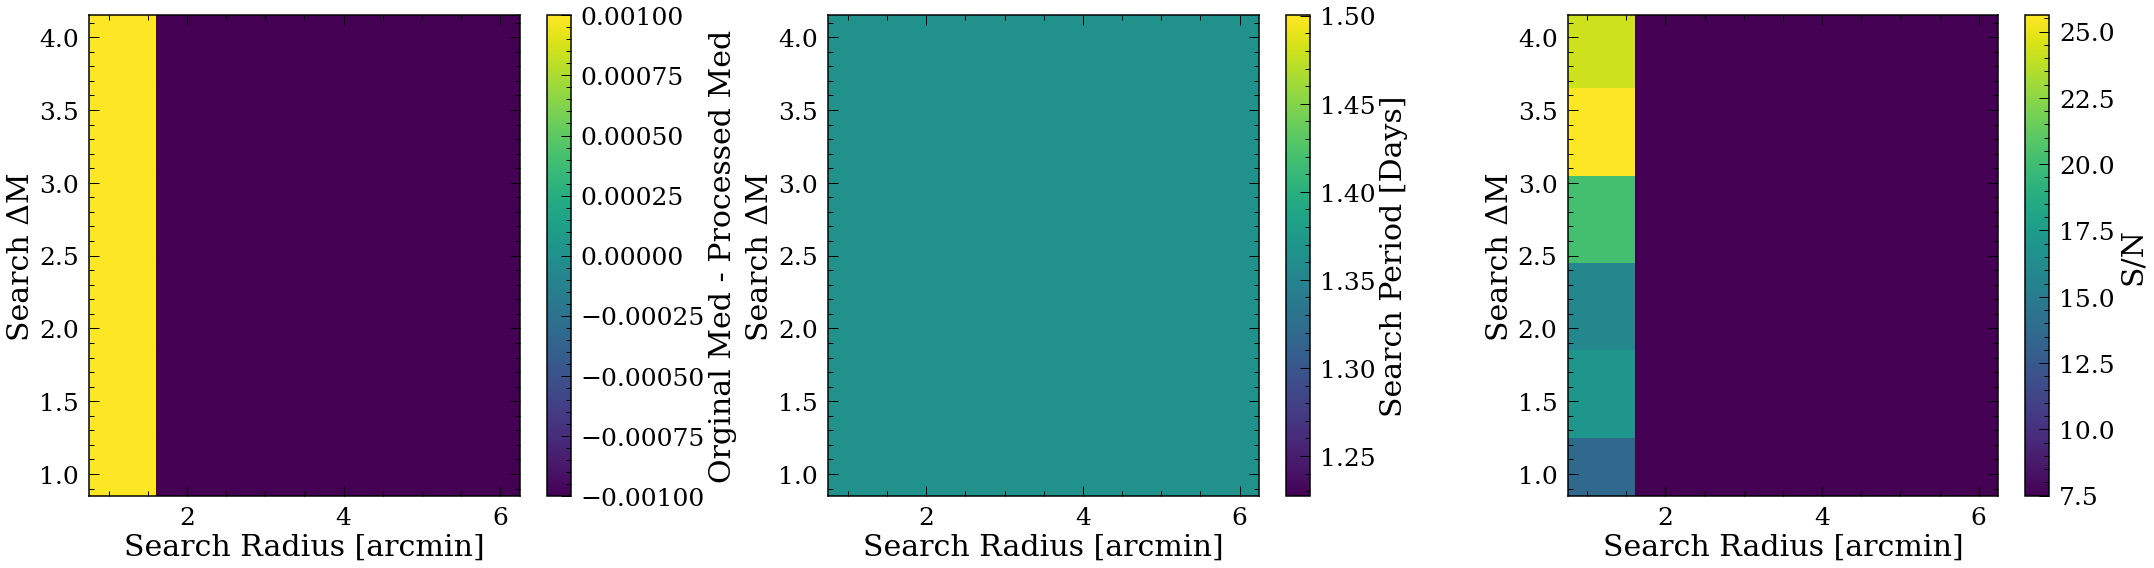

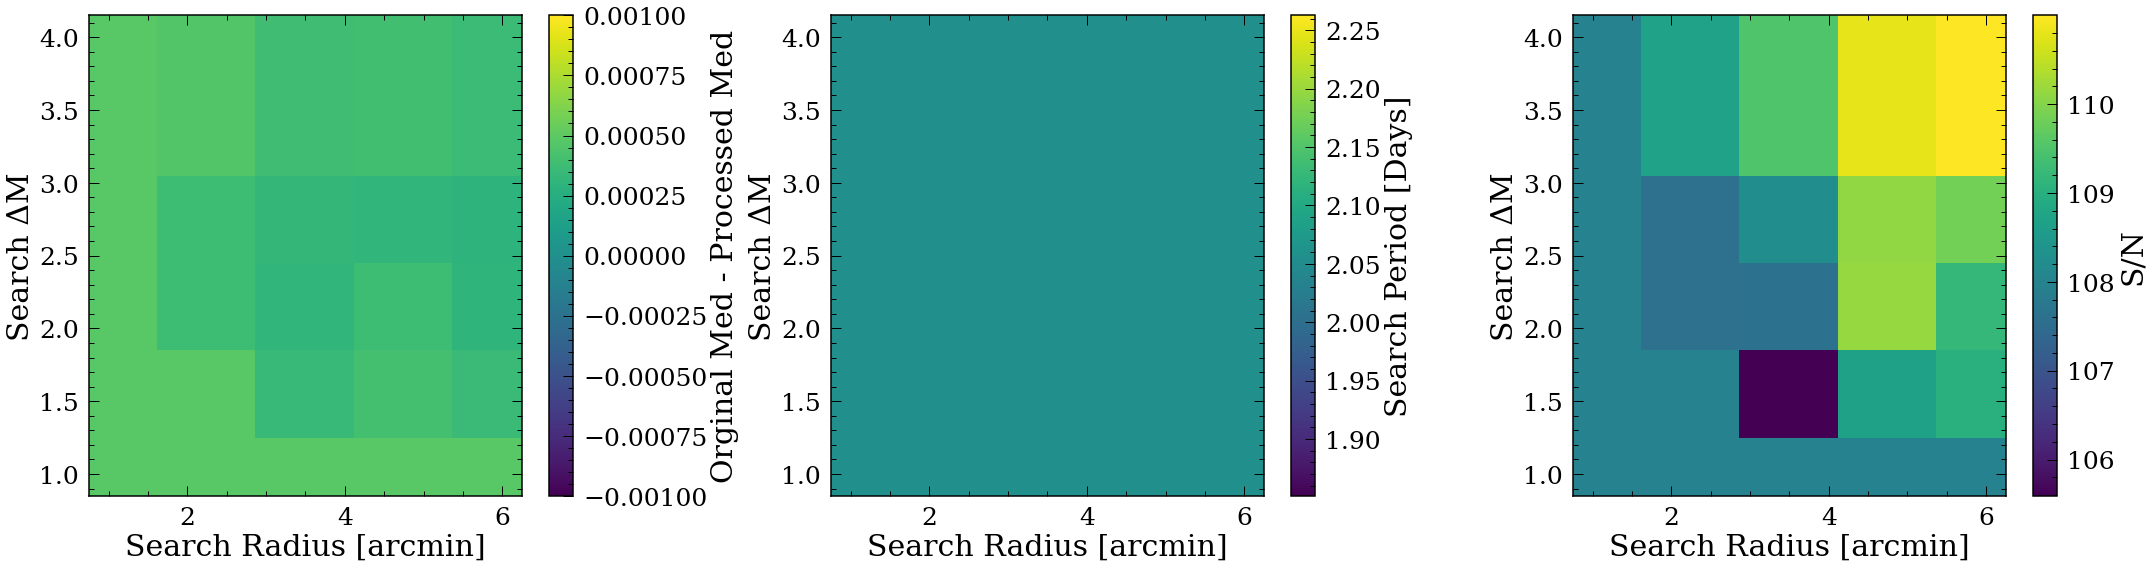

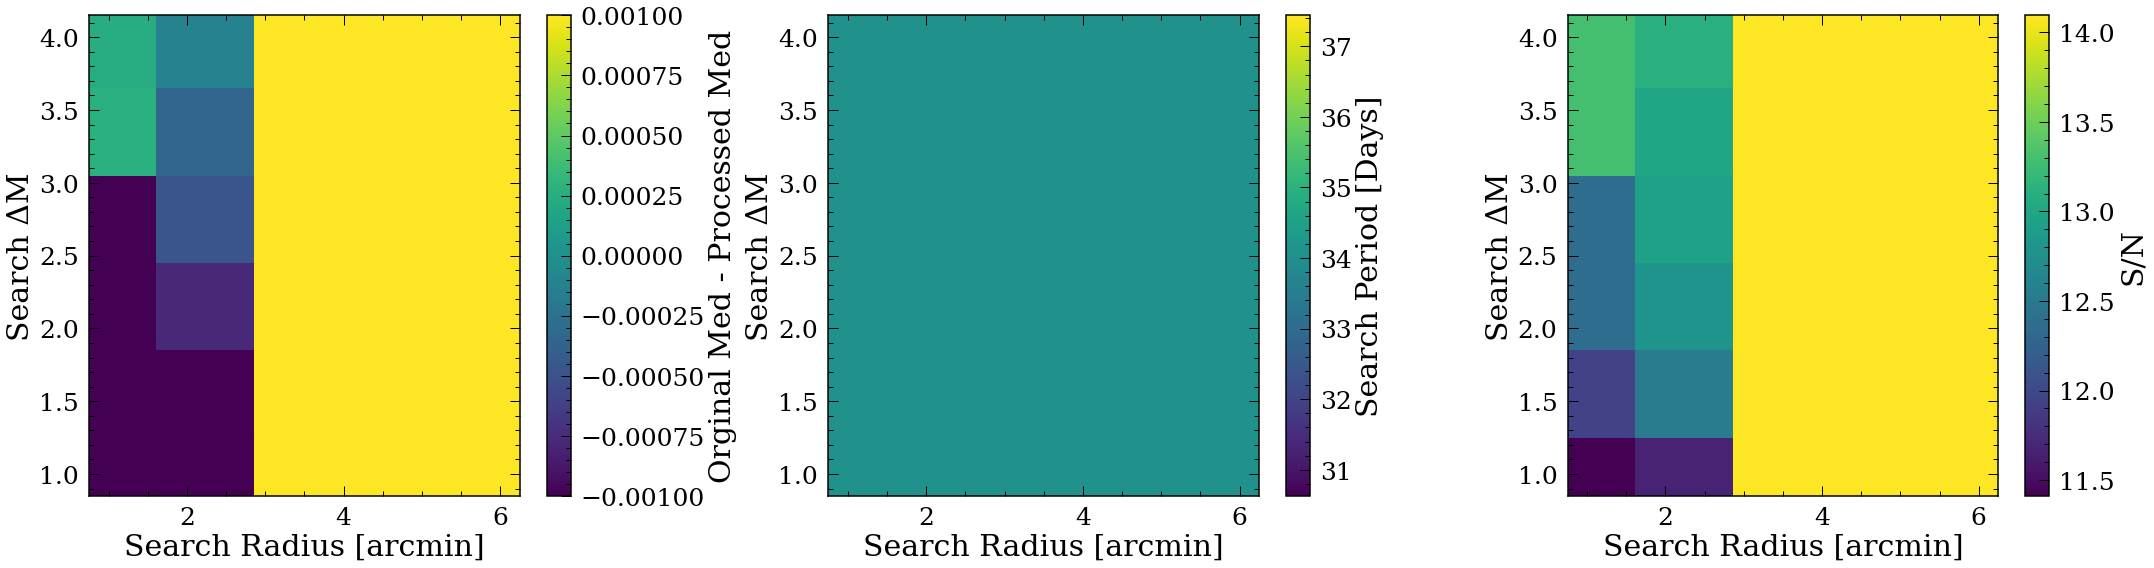

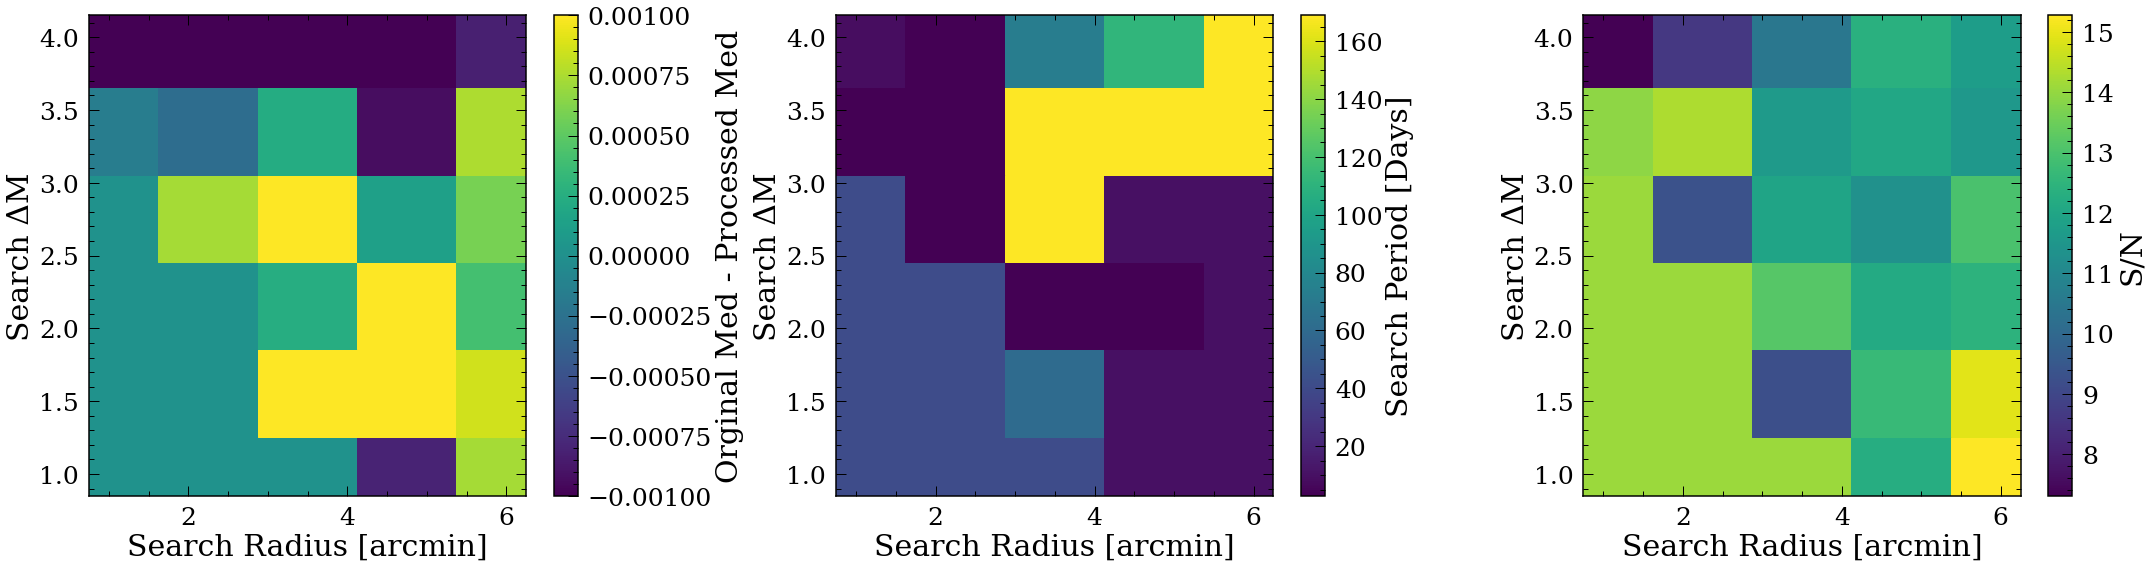

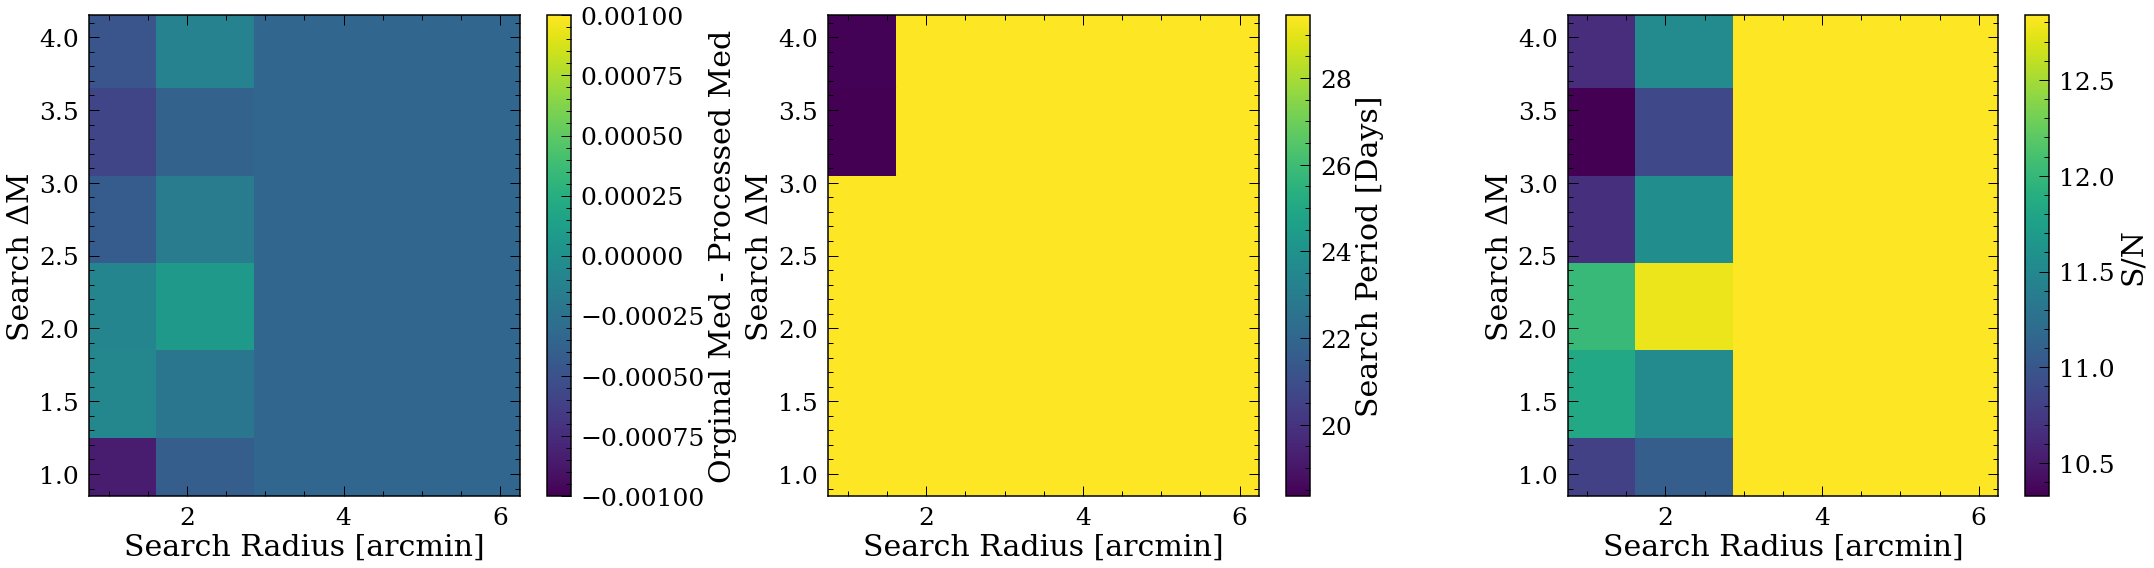

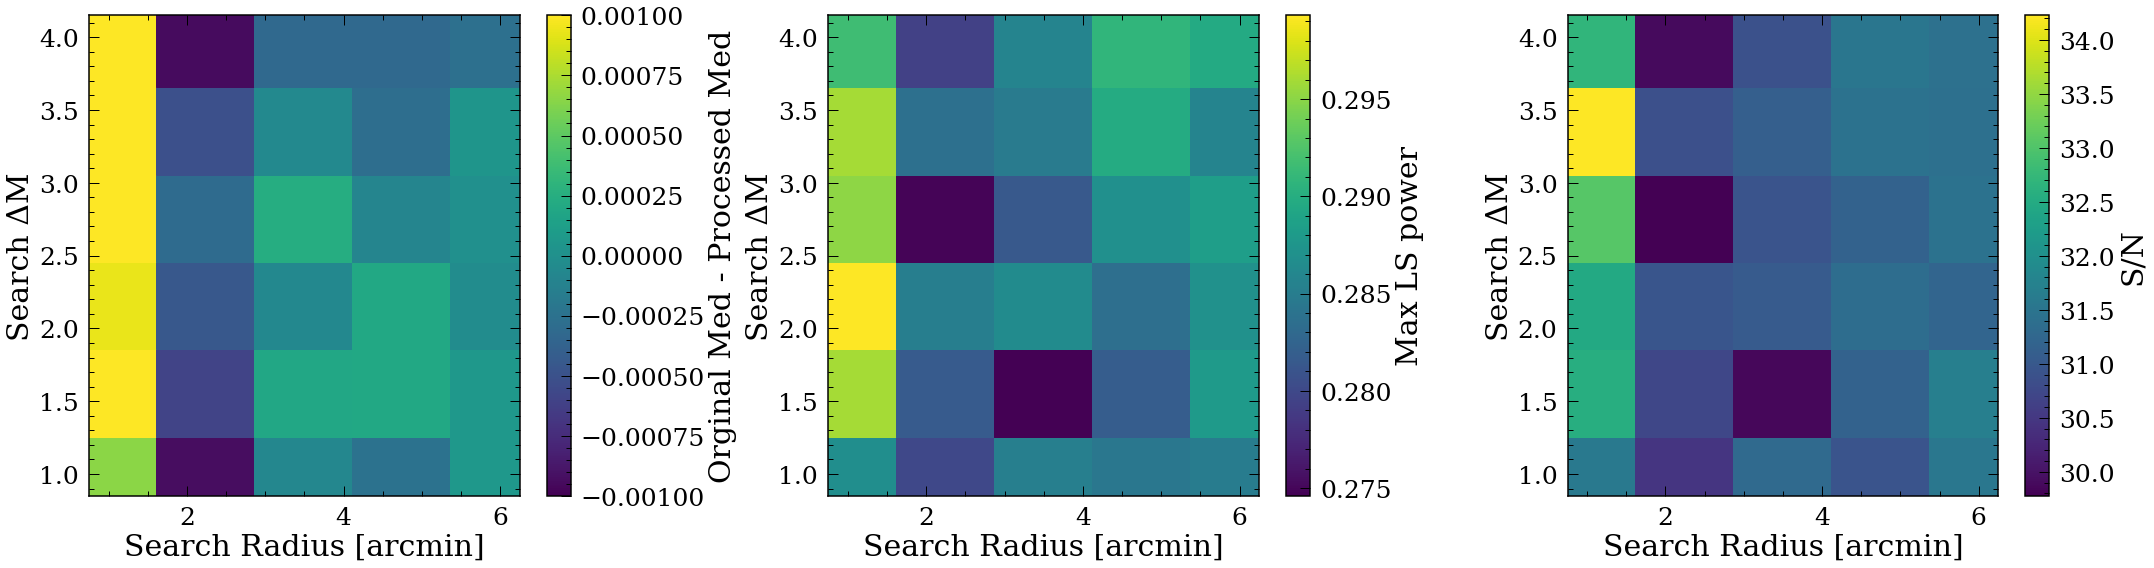

In [773]:
avemedde = np.zeros(len(magsearches[0]))
avemaxls = np.zeros(len(maxpowers[0]))
aveSN = np.zeros(len(maxpowers[0]))

for i in trange(teststars):
    plt.figure(figsize=(30,8))
    plt.subplot(1,3,1)
    plt.scatter(radsearches[i], magsearches[i], c=medorpowers[i]-medpowers[i],
               s=10000, marker='s',vmin=-0.001,vmax=0.001)
    plt.xlabel('Search Radius [arcmin]')
    plt.ylabel('Search ΔM')
    cb = plt.colorbar()
    cb.set_label('Orginal Med - Processed Med')
    
    plt.subplot(1,3,2)
    plt.scatter(radsearches[i], magsearches[i], c=allprots[i],
               s=10000, marker='s')
    plt.xlabel('Search Radius [arcmin]')
    plt.ylabel('Search ΔM')
    cb = plt.colorbar()
    cb.set_label('Search Period [Days]')
    plt.tight_layout()
    
    plt.subplot(1,3,3)
    plt.scatter(radsearches[i], magsearches[i], c=maxpowers[i]/medpowers[i],
               s=10000, marker='s')
    plt.xlabel('Search Radius [arcmin]')
    plt.ylabel('Search ΔM')
    cb = plt.colorbar()
    cb.set_label('S/N')
    plt.tight_layout()
    
    avemedde = avemedde+medorpowers[i]-medpowers[i]
    avemaxls = avemaxls+maxpowers[i]
    aveSN = aveSN+maxpowers[i]/medpowers[i]
    
avemedde, avemaxls, aveSN = avemedde/5, avemaxls/5, aveSN/5

plt.figure(figsize=(30,8))
plt.subplot(1,3,1)
plt.scatter(radsearches[i], magsearches[i], c=avemedde,
           s=10000, marker='s',vmin=-0.001,vmax=0.001)
plt.xlabel('Search Radius [arcmin]')
plt.ylabel('Search ΔM')
cb = plt.colorbar()
cb.set_label('Orginal Med - Processed Med')

plt.subplot(1,3,2)
plt.scatter(radsearches[i], magsearches[i], c=avemaxls,
           s=10000, marker='s')
plt.xlabel('Search Radius [arcmin]')
plt.ylabel('Search ΔM')
cb = plt.colorbar()
cb.set_label('Max LS power')
plt.tight_layout()

plt.subplot(1,3,3)
plt.scatter(radsearches[i], magsearches[i], c=aveSN,
           s=10000, marker='s')
plt.xlabel('Search Radius [arcmin]')
plt.ylabel('Search ΔM')
cb = plt.colorbar()
cb.set_label('S/N')
plt.tight_layout()


# Check periods after folding

In [965]:
def pf(ids, P):
    star_name = "2MASS "+ids
    c = SkyCoord.from_name(star_name, frame='icrs')
    mainlc = download_ztf_archive_lightcurves(c.ra.deg, c.dec.deg, sr=0.001, 
                                              lcout=True)
    
    mainlc = mainlc.loc[mainlc['oid']==mainlc['oid'][0]].reset_index(drop=True)
    mainlc = mainlc.dropna(subset=['mjd','mag','magerr']).reset_index(drop=True)
    mainlc = mainlc[['oid','mjd','mag','magerr']]
    lctime = mainlc.mjd.values
    lcmags = mainlc.mag.values
    
    t_fold=(lctime-np.median(lctime))-np.round((lctime-np.median(lctime))/P)*P
    
    plt.figure(figsize=(20,8))
    plt.subplot(1,2,1)
    plt.plot(lctime,  lcmags, 'ko')   
    plt.subplot(1,2,2)
    plt.plot(t_fold,  lcmags, 'ko')   

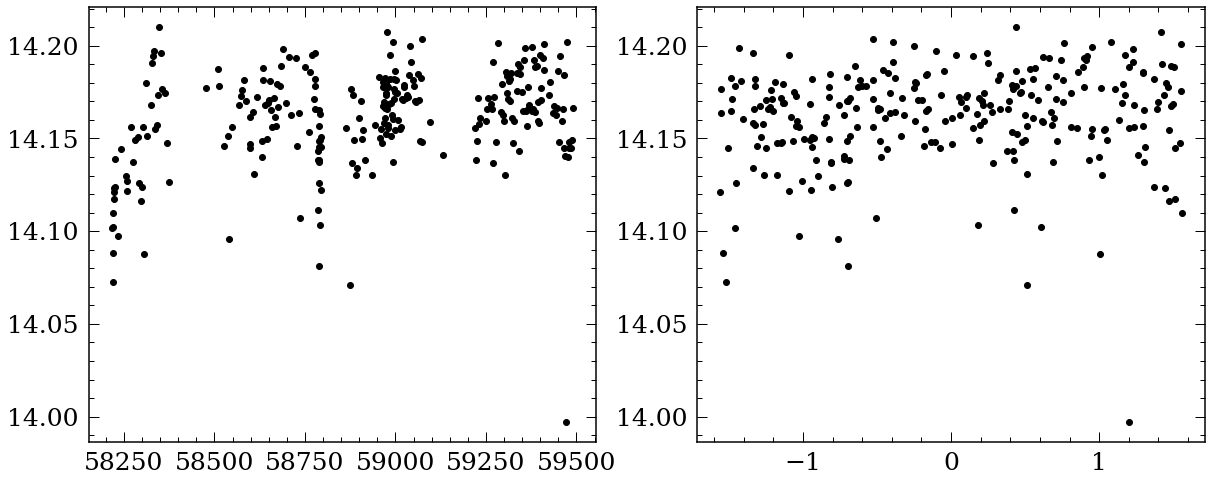

In [1005]:
pf('J16041322+2331386',3.12)

# possible to get period?


In [1006]:

idinc = ['J00240376+2626299', 'J00304867+7742338','J00355322+5241123','J01192628+5450382',
        'J02271705+5432479','J02364412+2240265','J02514973+2929131','J03223165+2858291',
        'J03304890+5413551','J03364083+0329194','J03360868+3118398','J03425325+2326495',
        'J04123491+3529592','J04302527+3951000','J04434430+1505565','J04523448+4042255',
        'J05030563+2122362','J05532295+2212500','J06073185+4712266','J06363696+0619102',
        'J06405810+4944304','J06444751+1628181','J07170893+4545542','J07312949+0249084',
        'J07374384+0554368','J07454039+4931488','J08373021+0333458','J08595559+0610052',
        'J09182301+6037310','J09264503+0857421','J09585650+0558000','J10564633+3246278',
        'J10574650+0453319','J11052425+5005414','J11124232+7626563','J13022083+3227103',
        'J13155111+4006086','J14224340+1624464','J14311348+7526423','J14321078+1600494',
        'J15474070+2241165','J16041322+2331386','J16191111+0140411','J17335314+1655129',
        'J18133315+0532118','J18130657+2601519','J18315610+7730367','J18424498+1354168',
        'J18452147+0711584','J18452294+1851585','J19311257+3607300','J20414744+4938482',
        'J20515794+5922481','J21013344+3957037','J21381698+5257188','J22232904+3227334',
        'J22523963+7504190','J23025250+4338157','J04485783+3648237','J05405390+0854183',
        'J05553087+0124118','J06481555+0326243','J07302916+6247270','J07385081+1829205',
        'J08351992+1408333','J08571541+1924177','J10030191+3433197','J10211908+0804268',
        'J11005043+1204108','J14231683+1318096','J14305591+0858023','J15421432+6533122',
        'J17164779+1133523','J18081215+1134467','J18144837+7843103','J19505984+2009559',
        'J20434307+5509469','J21100351+6615021','J23270216+2710367','J10265964+5506530']
idinc = np.array(idinc)
print(len(idinc))


possbi = ['y', 'imp', 'imp', 'y', 
          'y', 'imp','imp','y',
          'y','imp','imp','imp',
          'imp','imp','?','imp',
          '?','imp','?','ztf',
          'imp','y','?','ztf',
          'imp','?', 'y','y',
          'ztf','ztf','imp','y',
          'imp','y','y','imp',
          'y','?','ztf','ztf',
          'y','imp','y','?',
          'imp','imp','y','imp',
          'imp','imp','y','imp',
         'imp','y','imp','imp',
          'imp','ztf','imp','imp',
          'imp','imp','y','imp',
         'ztf','y','?','imp',
          'y','ztf','y','y',
          '?','imp','imp','imp',
          'imp','ztf','?','imp']
possbi = np.array(possbi)
print(len(possbi))
print(sum(possbi=='ztf'))


eyecheck = pd.DataFrame(np.array((idinc, possbi)).T, columns=['2MASS','poss'])

80
80
10


# check run time

In [288]:
runtimes = pd.read_table('ztfProts', delimiter=',')
runtimes

id        prot          dt          pt
0    J00240376+2626299  117.075790  182.597601    9.937672
1    J00304867+7742338  388.409282  199.568209    7.552871
2    J00355322+5241123    0.999551  371.697443  232.127325
3    J01192628+5450382  598.463327  288.316492   11.185638
4    J02271705+5432479    1.411739  605.306482    1.527099
..                 ...         ...         ...         ...
126  J20434307+5509469    1.080409  849.362183    1.456243
127  J20434307+5509469  306.042201  839.492823    1.675180
128  J20434307+5509469    2.653215  830.555510    1.636672
129  J21100351+6615021   95.234123  333.429205   86.520655
130  J23270216+2710367   11.924466  109.274740    6.394726

[131 rows x 4 columns]

In [296]:
runtimes['tt'] = runtimes['dt']+runtimes['pt']
#runtimes['tt'].hist(bins=np.linspace(0,1000,100))
#runtimes['dt'].hist(bins=np.linspace(0,1000,100))
#runtimes['pt'].hist(bins=np.linspace(0,1000,100))

In [298]:
np.median(runtimes['tt'])/60

2.68139741619428

# New results from splitting lcs

In [614]:
prots_raw = pd.read_table('ztfProts_split', delimiter=',')

In [495]:

bestid = prots_raw['id'].values
bestprot = np.zeros(len(prots_raw))
maxprot = np.zeros(len(prots_raw))
same2 = np.zeros(len(prots_raw))


In [519]:
for i in trange(len(bestid)):
    prots_sing = prots.loc[prots['id']==bestid[i]]
    oneprot = prots_sing[['prot1','prot2','prot3','prot4','prot5']].dropna(axis=1).values[0]
    maxpowers = prots_sing[['maxpower1','maxpower2','maxpower3','maxpower4','maxpower5']].dropna(axis=1).values[0]
    
    if len(oneprot)<3:
        bestprot[i] = oneprot[maxpowers==max(maxpowers)]
        maxprot[i] = oneprot[maxpowers==max(maxpowers)]
        same2[i]=0
        continue
    oneprot_test = np.append(oneprot, [oneprot[0]])
    smalldiff = min(abs(np.diff(oneprot_test)))
    m2 = (abs(np.diff(oneprot_test))==min(abs(np.diff(oneprot_test))))
    m2 = np.append(m2,[False])
    if smalldiff/oneprot_test[m2]<0.05:
        bestprot[i]=oneprot_test[m2]
        same2[i]=1
    else:
        bestprot[i] = oneprot[maxpowers==max(maxpowers)]
        same2[i]=0
    maxprot[i] = oneprot[maxpowers==max(maxpowers)]
    
    

100%|██████████| 82/82 [00:00<00:00, 323.55it/s]


In [520]:
prots = pd.DataFrame(np.array((bestid, bestprot,maxprot,same2)).T, 
                     columns = ['2MASS', 'Prot_best','Prot_all','same_inx'])


In [521]:
df_cm = pd.merge(radec[['2MASS','P']], prots, left_on='2MASS', right_on='2MASS', how='inner')
df_cm = df_cm.drop_duplicates(subset=['2MASS'], keep='first')



In [522]:
from astroquery.gaia import Gaia
radius = u.Quantity(0.003, u.deg)
ids = df_cm['2MASS'].values
Gaia.ROW_LIMIT = 1
mags = np.zeros(len(df_cm))*np.nan
for i in trange(len(df_cm)):
    star_name = "2MASS "+ids[i]
    c = SkyCoord.from_name(star_name, frame='icrs')
    j = Gaia.cone_search_async(c, radius)
    r = j.get_results()
    try:
        mags[i] = r['phot_g_mean_mag'].value.data[0]
    except:
        continue

  1%|          | 1/82 [00:01<02:28,  1.83s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
  2%|▏         | 2/82 [00:03<02:03,  1.55s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
  4%|▎         | 3/82 [00:04<01:55,  1.46s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
  5%|▍         | 4/82 [00:05<01:49,  1.40s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
  6%|▌         | 5/82 [00:07<01:46,  1.39s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
  7%|▋         | 6/82 [00:08<01:43,  1.36s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
  9%|▊         | 7/82 [00:09<01:41,  1.36s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 10%|▉         | 8/82 [00:11<01:40,  1.36s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 11%|█         | 9/82 [00:12<01:38,  1.35s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 12%|█▏        | 10/82 [00:13<01:36,  1.34s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 13%|█▎        | 11/82 [00:15<01:35,  1.35s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 15%|█▍        | 12/82 [00:16<01:41,  1.45s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 16%|█▌        | 13/82 [00:18<01:36,  1.41s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 17%|█▋        | 14/82 [00:19<01:33,  1.37s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 18%|█▊        | 15/82 [00:20<01:31,  1.37s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 20%|█▉        | 16/82 [00:22<01:29,  1.35s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 21%|██        | 17/82 [00:23<01:27,  1.34s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 22%|██▏       | 18/82 [00:24<01:25,  1.33s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 23%|██▎       | 19/82 [00:26<01:23,  1.32s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 24%|██▍       | 20/82 [00:27<01:22,  1.32s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 26%|██▌       | 21/82 [00:28<01:20,  1.33s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 27%|██▋       | 22/82 [00:30<01:19,  1.32s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 28%|██▊       | 23/82 [00:31<01:17,  1.32s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 29%|██▉       | 24/82 [00:32<01:16,  1.33s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 30%|███       | 25/82 [00:34<01:16,  1.34s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 32%|███▏      | 26/82 [00:35<01:14,  1.34s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 33%|███▎      | 27/82 [00:36<01:13,  1.34s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 34%|███▍      | 28/82 [00:38<01:12,  1.33s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 35%|███▌      | 29/82 [00:39<01:10,  1.33s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 37%|███▋      | 30/82 [00:40<01:09,  1.33s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 38%|███▊      | 31/82 [00:42<01:08,  1.34s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 39%|███▉      | 32/82 [00:43<01:07,  1.35s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 40%|████      | 33/82 [00:44<01:06,  1.35s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 41%|████▏     | 34/82 [00:46<01:04,  1.35s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 43%|████▎     | 35/82 [00:47<01:02,  1.34s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 44%|████▍     | 36/82 [00:48<01:01,  1.33s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 45%|████▌     | 37/82 [00:50<00:59,  1.33s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 46%|████▋     | 38/82 [00:51<00:58,  1.32s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 48%|████▊     | 39/82 [00:52<00:56,  1.33s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 49%|████▉     | 40/82 [00:54<00:55,  1.32s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 50%|█████     | 41/82 [00:55<00:53,  1.32s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 51%|█████     | 42/82 [00:56<00:53,  1.33s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 52%|█████▏    | 43/82 [00:58<00:51,  1.33s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 54%|█████▎    | 44/82 [01:03<01:38,  2.60s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 55%|█████▍    | 45/82 [01:05<01:22,  2.23s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 56%|█████▌    | 46/82 [01:06<01:10,  1.97s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 57%|█████▋    | 47/82 [01:07<01:01,  1.77s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 59%|█████▊    | 48/82 [01:09<00:55,  1.64s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 60%|█████▉    | 49/82 [01:10<00:51,  1.55s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 61%|██████    | 50/82 [01:11<00:47,  1.48s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 62%|██████▏   | 51/82 [01:13<00:44,  1.44s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 63%|██████▎   | 52/82 [01:14<00:42,  1.42s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 65%|██████▍   | 53/82 [01:15<00:40,  1.40s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 66%|██████▌   | 54/82 [01:17<00:38,  1.38s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 67%|██████▋   | 55/82 [01:18<00:37,  1.37s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 68%|██████▊   | 56/82 [01:19<00:35,  1.37s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 70%|██████▉   | 57/82 [01:21<00:34,  1.37s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 71%|███████   | 58/82 [01:22<00:32,  1.36s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 72%|███████▏  | 59/82 [01:23<00:31,  1.35s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 73%|███████▎  | 60/82 [01:25<00:29,  1.34s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 74%|███████▍  | 61/82 [01:26<00:27,  1.33s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 76%|███████▌  | 62/82 [01:27<00:26,  1.33s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 77%|███████▋  | 63/82 [01:29<00:25,  1.32s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 78%|███████▊  | 64/82 [01:30<00:24,  1.34s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 79%|███████▉  | 65/82 [01:31<00:22,  1.34s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 80%|████████  | 66/82 [01:33<00:21,  1.34s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 82%|████████▏ | 67/82 [01:34<00:20,  1.34s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 83%|████████▎ | 68/82 [01:35<00:18,  1.34s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 84%|████████▍ | 69/82 [01:37<00:17,  1.33s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 85%|████████▌ | 70/82 [01:38<00:16,  1.34s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 87%|████████▋ | 71/82 [01:39<00:14,  1.34s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 88%|████████▊ | 72/82 [01:41<00:13,  1.34s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 89%|████████▉ | 73/82 [01:42<00:12,  1.34s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 90%|█████████ | 74/82 [01:43<00:10,  1.35s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 91%|█████████▏| 75/82 [01:45<00:09,  1.35s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 93%|█████████▎| 76/82 [01:46<00:08,  1.34s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 94%|█████████▍| 77/82 [01:47<00:06,  1.33s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 95%|█████████▌| 78/82 [01:49<00:05,  1.34s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 96%|█████████▋| 79/82 [01:50<00:04,  1.34s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 98%|█████████▊| 80/82 [01:51<00:02,  1.35s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
 99%|█████████▉| 81/82 [01:53<00:01,  1.36s/it]

INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.
100%|██████████| 82/82 [01:54<00:00,  1.40s/it]

INFO: Query finished. [astroquery.utils.tap.core]


In [523]:
df_cm['gmag'] = mags

21 0.25609756097560976
14 0.35


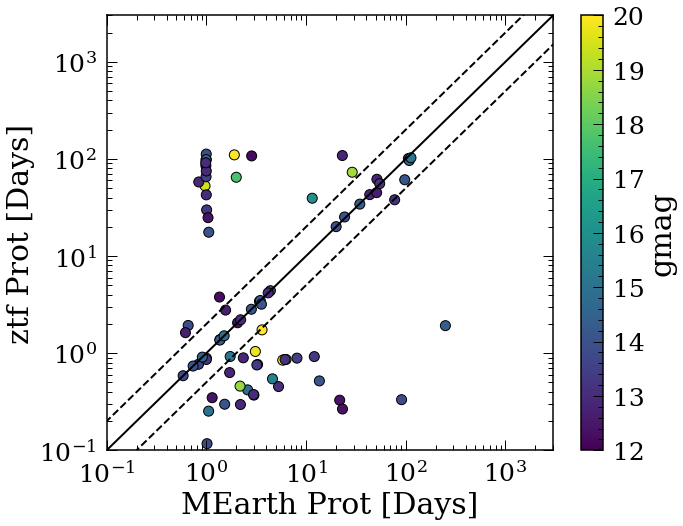

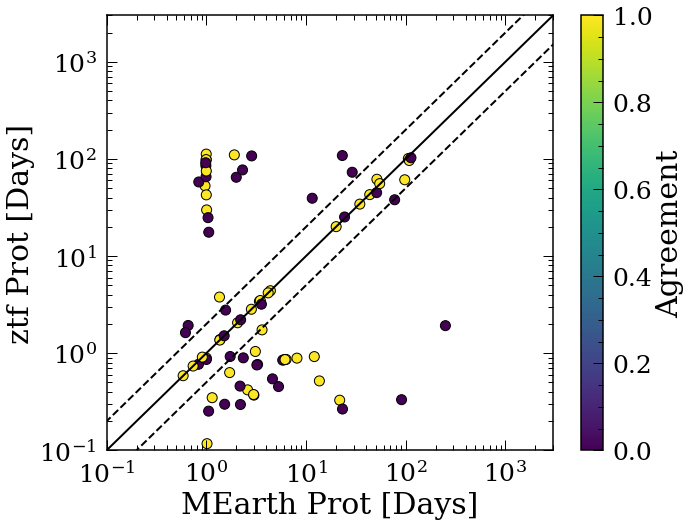

In [553]:
plt.figure(figsize=(10,8))
plt.scatter(df_cm['Prot_best'], df_cm['P'], c=df_cm['gmag'], s=100, 
            edgecolor='k', vmin=12, vmax=20)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('MEarth Prot [Days]')
plt.ylabel('ztf Prot [Days]')
plt.plot([0,3000], [0,3000], 'k-')
plt.plot([0,3000], [0,6000], 'k--')
plt.plot([0,6000], [0,3000], 'k--')
plt.xlim([0.1,3000])
plt.ylim([0.1,3000])
cb = plt.colorbar()


goodp = (abs(df_cm['Prot_best']-df_cm['P'])/df_cm['P'])<0.1
goodp = np.array(goodp, dtype=int)
df_cm['agreement'] = goodp
print(sum(goodp), sum((abs(df_cm['Prot_best']-df_cm['P'])/df_cm['P'])<0.1)/len(df_cm))


cb.set_label('gmag')

plt.figure(figsize=(10,8))
plt.scatter(df_cm['Prot_best'], df_cm['P'], c=df_cm['same_inx'], s=100, 
            edgecolor='k', vmin=0, vmax=1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('MEarth Prot [Days]')
plt.ylabel('ztf Prot [Days]')
plt.plot([0,3000], [0,3000], 'k-')
plt.plot([0,3000], [0,6000], 'k--')
plt.plot([0,6000], [0,3000], 'k--')
plt.xlim([0.1,3000])
plt.ylim([0.1,3000])
cb = plt.colorbar()
cb.set_label('Agreement')

df_cm_good = df_cm.loc[df_cm['same_inx']==1]
goodp = (abs(df_cm_good['Prot_all']-df_cm_good['P'])/df_cm_good['P'])<0.1
print(sum(goodp), sum((abs(df_cm_good['Prot_all']-df_cm_good['P'])/df_cm_good['P'])<0.1)/len(df_cm_good))



20 0.24390243902439024
14 0.35


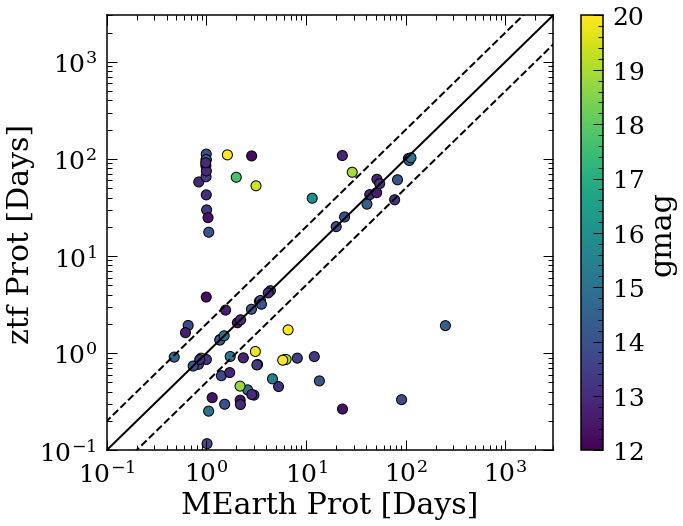

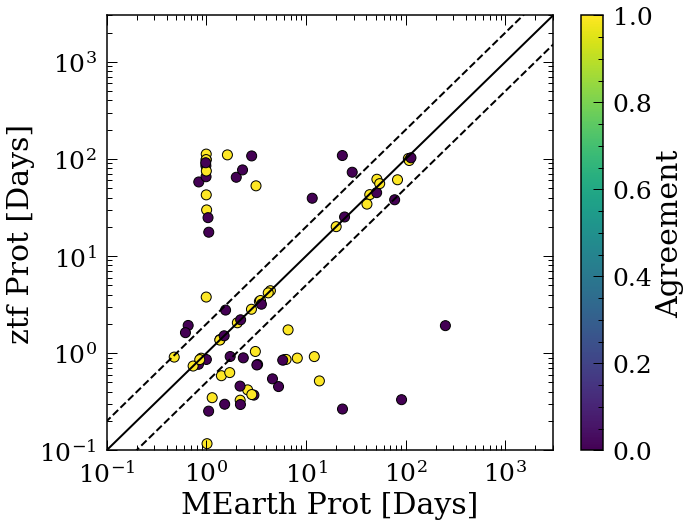

In [558]:
plt.figure(figsize=(10,8))
plt.scatter(df_cm['Prot_all'], df_cm['P'], c=df_cm['gmag'], s=100, 
            edgecolor='k', vmin=12, vmax=20)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('MEarth Prot [Days]')
plt.ylabel('ztf Prot [Days]')
plt.plot([0,3000], [0,3000], 'k-')
plt.plot([0,3000], [0,6000], 'k--')
plt.plot([0,6000], [0,3000], 'k--')
plt.xlim([0.1,3000])
plt.ylim([0.1,3000])
cb = plt.colorbar()
cb.set_label('gmag')

goodp = (abs(df_cm['Prot_all']-df_cm['P'])/df_cm['P'])<0.1
print(sum(goodp), sum((abs(df_cm['Prot_all']-df_cm['P'])/df_cm['P'])<0.1)/len(df_cm))

plt.figure(figsize=(10,8))
plt.scatter(df_cm['Prot_all'], df_cm['P'], c=df_cm['same_inx'], s=100, 
            edgecolor='k', vmin=0, vmax=1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('MEarth Prot [Days]')
plt.ylabel('ztf Prot [Days]')
plt.plot([0,3000], [0,3000], 'k-')
plt.plot([0,3000], [0,6000], 'k--')
plt.plot([0,6000], [0,3000], 'k--')
plt.xlim([0.1,3000])
plt.ylim([0.1,3000])
cb = plt.colorbar()
cb.set_label('Agreement')

df_cm_good = df_cm.loc[df_cm['same_inx']==1]
goodp = (abs(df_cm_good['Prot_all']-df_cm_good['P'])/df_cm_good['P'])<0.1
print(sum(goodp), sum((abs(df_cm_good['Prot_all']-df_cm_good['P'])/df_cm_good['P'])<0.1)/len(df_cm_good))



In [570]:
prots_raw = pd.merge(prots_raw, df_cm[['Prot_best','gmag','2MASS','agreement','P']],left_on='id', right_on='2MASS', how='inner')


In [571]:
sum(prots_raw['agreement'])

21

40 0.4878048780487805


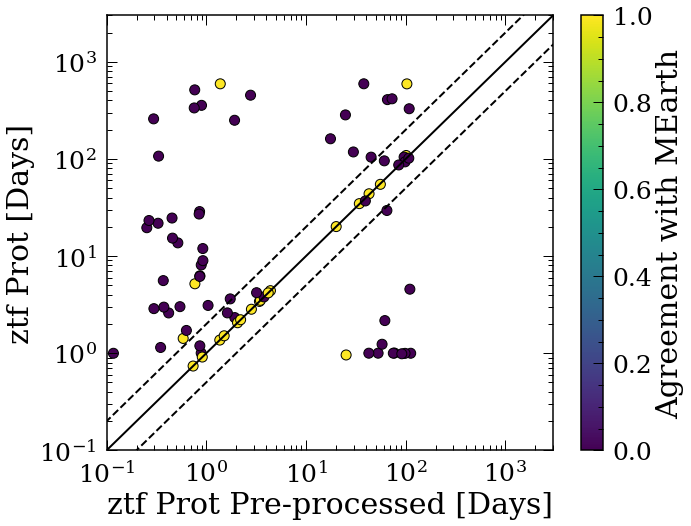

In [585]:
plt.figure(figsize=(10,8))
plt.scatter(prots_raw['P'], prots_raw['prot1'], c=prots_raw['agreement'], s=100, 
            edgecolor='k', vmin=0, vmax=1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('ztf Prot Pre-processed [Days]')
plt.ylabel('ztf Prot [Days]')
plt.plot([0,3000], [0,3000], 'k-')
plt.plot([0,3000], [0,6000], 'k--')
plt.plot([0,6000], [0,3000], 'k--')
plt.xlim([0.1,3000])
plt.ylim([0.1,3000])
cb = plt.colorbar()
cb.set_label('Agreement with MEarth')

prots_raw['overall1'] = (abs(prots_raw['prot1']-prots_raw['P'])/prots_raw['P'])<0.1
prots_raw['overall2'] = (abs(prots_raw['prot2']-prots_raw['P'])/prots_raw['P'])<0.1
prots_raw['overall3'] = (abs(prots_raw['prot3']-prots_raw['P'])/prots_raw['P'])<0.1
prots_raw['overall4'] = (abs(prots_raw['prot4']-prots_raw['P'])/prots_raw['P'])<0.1
prots_raw['overall5'] = (abs(prots_raw['prot5']-prots_raw['P'])/prots_raw['P'])<0.1
goodp = (abs(prots_raw['prot1']-prots_raw['P'])/prots_raw['P'])<0.1
goodp = goodp|((abs(prots_raw['prot2']-prots_raw['P'])/prots_raw['P'])<0.1)
goodp = goodp|((abs(prots_raw['prot3']-prots_raw['P'])/prots_raw['P'])<0.1)
goodp = goodp|((abs(prots_raw['prot4']-prots_raw['P'])/prots_raw['P'])<0.1)
goodp = goodp|((abs(prots_raw['prot5']-prots_raw['P'])/prots_raw['P'])<0.1)
prots_raw['overall'] = goodp
print(sum(goodp), sum(goodp)/len(prots_raw))





In [608]:
gaia = pd.read_csv('MEarth_Rotator_List_v2.csv')
prots_raw = pd.merge(prots_raw, gaia[['2MASS','Ignore']], left_on='2MASS', right_on='2MASS')


In [611]:
sum(prots_raw['Ignore']==1)

7

40 82 0.4878048780487805


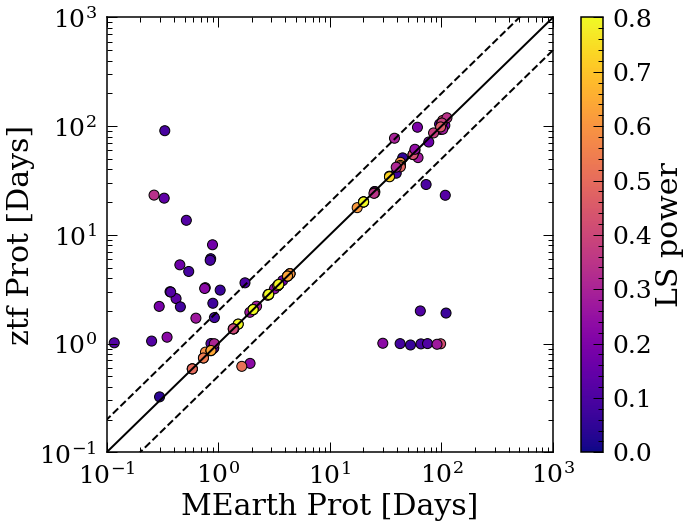

In [612]:
import matplotlib.colors
def getcolor(vrange,cm=plt.cm.get_cmap('jet')):
    cmap = cm
    norm = matplotlib.colors.Normalize(vmin=min(vrange), vmax=max(vrange))
    return [cmap(norm(i)) for i in vrange]
colors = getcolor(np.array([1,2,3,4,5,6]),plt.cm.get_cmap('plasma'))

cmap = plt.cm.get_cmap('plasma')
plt.figure(figsize=(10,8))
prots_pag = prots_raw.loc[prots_raw['overall']==0]
plt.scatter(prots_pag['P'], prots_pag['Prot_best'], c=prots_pag['maxpower1'], s=100, 
                edgecolor='k', cmap=cmap, vmin=0, vmax=0.8)
print(sum(prots_raw['overall']==1), len(prots_raw), sum(prots_raw['overall']==1)/len(prots_raw))

for i in range(1,6):
    prots_pag = prots_raw.loc[prots_raw['overall'+str(i)]==1]
    plt.scatter(prots_pag['P'], prots_pag['prot'+str(i)], 
                c=prots_pag['maxpower'+str(i)], s=100, 
                edgecolor='k', label='At least one season agrees', 
                cmap=cmap, vmin=0, vmax=0.8)
    
plt.xscale('log')
plt.yscale('log')
plt.xlabel('MEarth Prot [Days]')
plt.ylabel('ztf Prot [Days]')
plt.plot([0,1000], [0,1000], 'k-')
plt.plot([0,1000], [0,2000], 'k--')
plt.plot([0,2000], [0,1000], 'k--')
plt.xlim([0.1,1000])
plt.ylim([0.1,1000])

cb = plt.colorbar()
cb.set_label('LS power')



38 0.5066666666666667


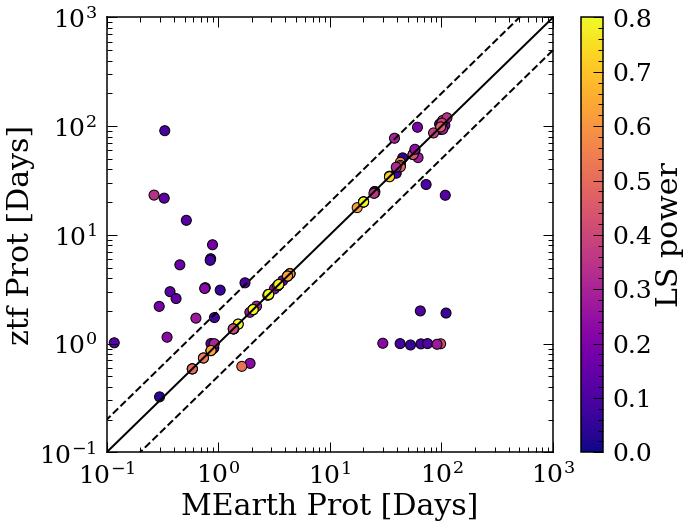

In [610]:
# only do the ones Jason said we should for ztf
import matplotlib.colors
prots_raw_sort = prots_raw.loc[prots_raw['Ignore']==0].reset_index(drop=True)

cmap = plt.cm.get_cmap('plasma')
plt.figure(figsize=(10,8))
prots_pag = prots_raw_sort.loc[prots_raw_sort['overall']==0]
plt.scatter(prots_pag['P'], prots_pag['Prot_best'], c=prots_pag['maxpower1'], s=100, 
                edgecolor='k', cmap=cmap, vmin=0, vmax=0.8)
print(sum(prots_raw_sort['overall']==1), sum(prots_raw_sort['overall']==1)/len(prots_raw_sort))

for i in range(1,6):
    prots_pag = prots_raw_sort.loc[prots_raw_sort['overall'+str(i)]==1]
    plt.scatter(prots_pag['P'], prots_pag['prot'+str(i)], 
                c=prots_pag['maxpower'+str(i)], s=100, 
                edgecolor='k', label='At least one season agrees', 
                cmap=cmap, vmin=0, vmax=0.8)
    
plt.xscale('log')
plt.yscale('log')
plt.xlabel('MEarth Prot [Days]')
plt.ylabel('ztf Prot [Days]')
plt.plot([0,1000], [0,1000], 'k-')
plt.plot([0,1000], [0,2000], 'k--')
plt.plot([0,2000], [0,1000], 'k--')
plt.xlim([0.1,1000])
plt.ylim([0.1,1000])

cb = plt.colorbar()
cb.set_label('LS power')




14 0.35


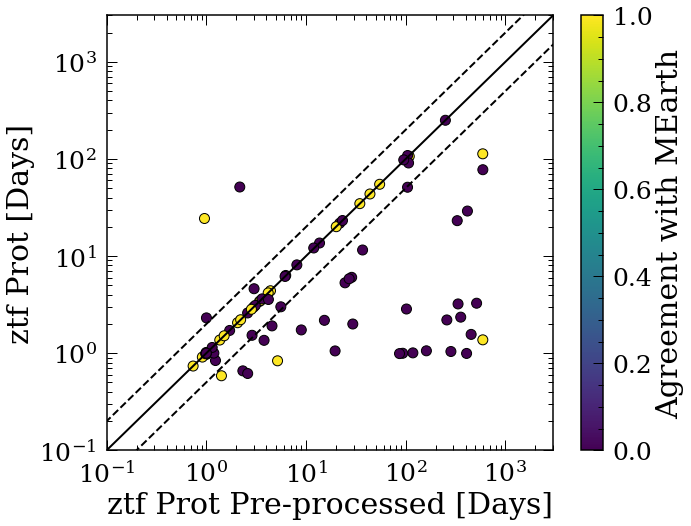

In [566]:
plt.figure(figsize=(10,8))
plt.scatter(prots_raw['prot1'], prots_raw['Prot_best'], c=prots_raw['agreement'], s=100, 
            edgecolor='k', vmin=0, vmax=1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('ztf Prot Pre-processed [Days]')
plt.ylabel('ztf Prot [Days]')
plt.plot([0,3000], [0,3000], 'k-')
plt.plot([0,3000], [0,6000], 'k--')
plt.plot([0,6000], [0,3000], 'k--')
plt.xlim([0.1,3000])
plt.ylim([0.1,3000])
cb = plt.colorbar()
cb.set_label('Agreement with MEarth')

df_cm_good = df_cm.loc[df_cm['same_inx']==1]
goodp = (abs(df_cm_good['Prot_all']-df_cm_good['P'])/df_cm_good['P'])<0.1
print(sum(goodp), sum((abs(df_cm_good['Prot_all']-df_cm_good['P'])/df_cm_good['P'])<0.1)/len(df_cm_good))




# New results from splitting lcs check median power (noise) 

In [635]:
prots_raw = pd.read_table('ztfProts_split_medpower', delimiter=',')


In [636]:
prots_raw

id       prot1      prot2       prot3      prot4     prot5  \
0   J00240376+2626299  117.897664   1.507829  126.662600   1.007072  0.996985   
1   J00355322+5241123    0.999481   3.150307    0.970686        NaN       NaN   
2   J01192628+5450382  161.124564  17.796037    1.057552        NaN       NaN   
3   J02271705+5432479    1.002596   0.997523    8.093517   0.888559  2.150715   
4   J02364412+2240265    5.586660   3.000900         NaN        NaN       NaN   
..                ...         ...        ...         ...        ...       ...   
77  J18144837+7843103    0.999426   1.000592  377.566190        NaN       NaN   
78  J19505984+2009559    0.985686        NaN         NaN        NaN       NaN   
79  J20434307+5509469    0.999319   0.998626    0.336810   2.650873       NaN   
80  J21100351+6615021   95.502264  82.690075   90.562978  97.716427       NaN   
81  J23270216+2710367   11.940662  12.102681   11.981525   0.997441       NaN   

    prot6  prot7  maxpower1  maxpower2  ...  maxpower6  maxpower7  \
0     NaN    NaN   0.228308   0.378497  ...        NaN        NaN   
1     NaN    NaN   0.063962   0.205074  ...        NaN        NaN   
2     NaN    NaN   0.461764   0.612313  ...        NaN        NaN   
3     NaN    NaN   0.179787   0.213110  ...        NaN        NaN   
4     NaN    NaN   0.133778   0.182245  ...        NaN        NaN   
..    ...    ...        ...        ...  ...        ...        ...   
77    NaN    NaN   0.112493   0.139470  ...        NaN        NaN   
78    NaN    NaN   0.273996        NaN  ...        NaN        NaN   
79    NaN    NaN   0.087310   0.212139  ...        NaN        NaN   
80    NaN    NaN   0.196350   0.640245  ...        NaN        NaN   
81    NaN    NaN   0.164766   0.400786  ...        NaN        NaN   

    medpower_org  medpower1  medpower2  medpower3  medpower4  medpower5  \
0       0.005106   0.004747   0.023466   0.021691   0.009599   0.034499   
1       0.010257   0.012790   0.033085   0.021507        NaN        NaN   
2       0.025378   0.018834   0.050580   0.027826        NaN        NaN   
3       0.046375   0.065973   0.012218   0.145268   0.012397   0.040838   
4       0.017566   0.011824   0.019363        NaN        NaN        NaN   
..           ...        ...        ...        ...        ...        ...   
77      0.003583   0.003410   0.009673   0.004401        NaN        NaN   
78      0.096138   0.098034        NaN        NaN        NaN        NaN   
79      0.002824   0.003219   0.008995   0.004188   0.008115        NaN   
80      0.002885   0.002408   0.022868   0.006296   0.005135        NaN   
81      0.004714   0.005500   0.025112   0.009200   0.030018        NaN   

    medpower6  medpower7  
0         NaN        NaN  
1         NaN        NaN  
2         NaN        NaN  
3         NaN        NaN  
4         NaN        NaN  
..        ...        ...  
77        NaN        NaN  
78        NaN        NaN  
79        NaN        NaN  
80        NaN        NaN  
81        NaN        NaN  

[82 rows x 23 columns]

In [644]:
for i in range(1,8):
    prots_raw['SN'+str(i)]=prots_raw['maxpower'+str(i)]/prots_raw['medpower'+str(i)]

In [662]:
bestid = prots_raw['id'].values
bestprot = np.zeros(len(prots_raw))
bestsn = np.zeros(len(prots_raw))

In [694]:
for i in trange(len(bestid)):
    prots_sing = prots_raw.iloc[i]
    allsn = np.array([prots_sing['SN'+str(j)] for j in range(1,8)])
    #allsn = np.array([prots_sing['medpower'+str(j)] for j in range(1,8)])
    allsn = allsn[allsn==allsn]
    bestprot[i] = prots_sing['prot'+str(np.argmax(allsn)+1)]
    #bestprot[i] = prots_sing['prot'+str(np.argmin(allsn)+1)]
    bestsn[i] = min(allsn)

100%|██████████| 82/82 [00:00<00:00, 3787.85it/s]


In [695]:
prots_raw['bestprot'] = bestprot
prots_raw['bestSN'] = bestsn

In [696]:
df_cm = pd.merge(radec[['2MASS','P','gmag']], prots_raw, left_on='2MASS', right_on='id', how='inner')


25 82 0.3048780487804878


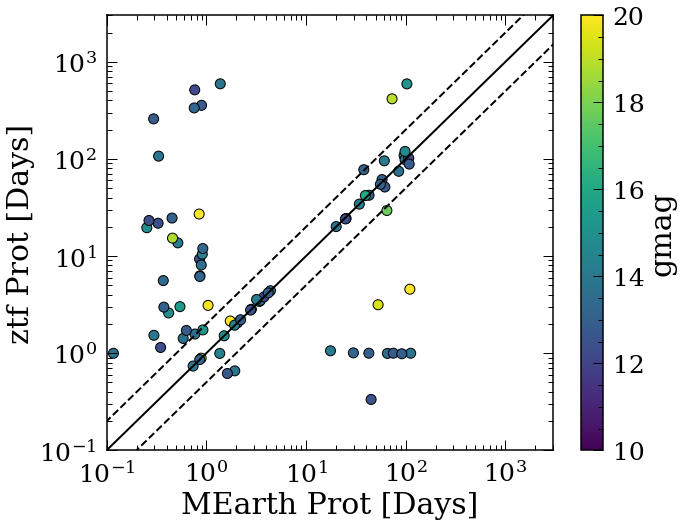

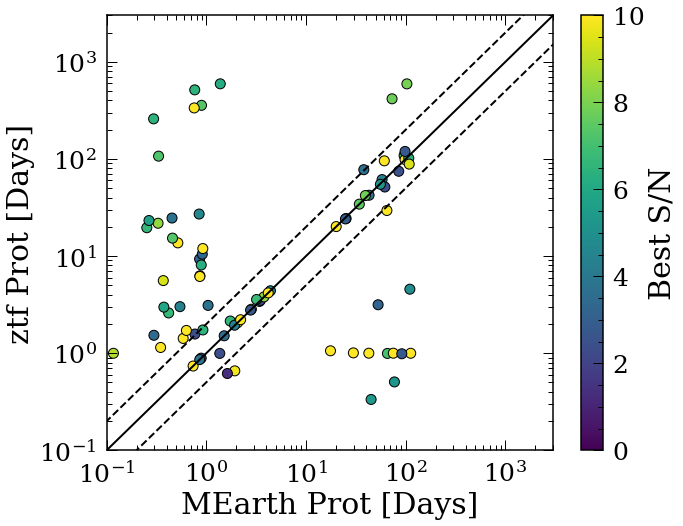

In [698]:
plt.figure(figsize=(10,8))
plt.scatter(df_cm['P'], df_cm['bestprot'], c=df_cm['gmag'], s=100, 
            edgecolor='k', vmin=10, vmax=20)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('MEarth Prot [Days]')
plt.ylabel('ztf Prot [Days]')
plt.plot([0,3000], [0,3000], 'k-')
plt.plot([0,3000], [0,6000], 'k--')
plt.plot([0,6000], [0,3000], 'k--')
plt.xlim([0.1,3000])
plt.ylim([0.1,3000])
cb = plt.colorbar()
cb.set_label('gmag')

plt.figure(figsize=(10,8))
plt.scatter(df_cm['P'], df_cm['bestprot'], c=df_cm['bestSN'], s=100, 
            edgecolor='k',vmin=0,vmax=10)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('MEarth Prot [Days]')
plt.ylabel('ztf Prot [Days]')
plt.plot([0,3000], [0,3000], 'k-')
plt.plot([0,3000], [0,6000], 'k--')
plt.plot([0,6000], [0,3000], 'k--')
plt.xlim([0.1,3000])
plt.ylim([0.1,3000])
cb = plt.colorbar()
cb.set_label('Best S/N')

goodp = (abs(df_cm['bestprot']-df_cm['P'])/df_cm['P'])<0.1

print(sum(goodp), len(df_cm), sum(goodp)/len(df_cm))

-0.00022985960816994996


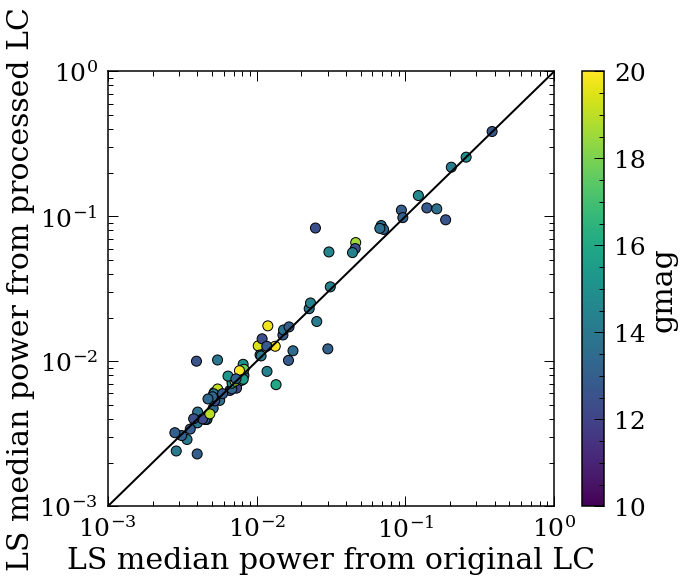

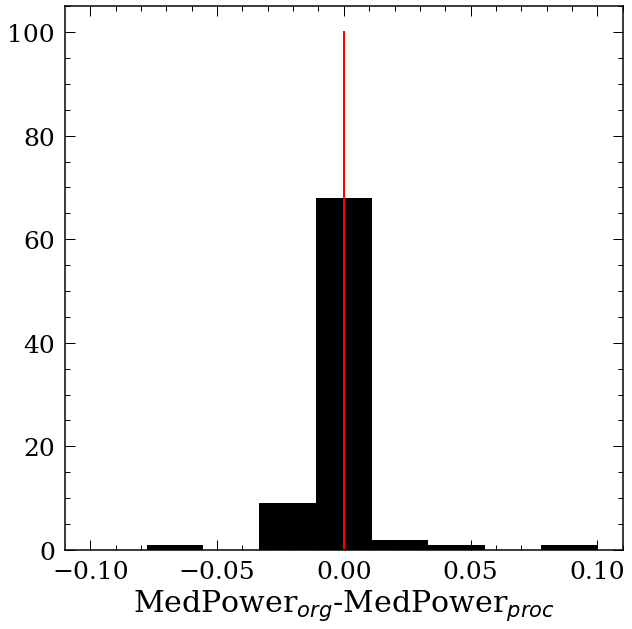

In [782]:
plt.figure(figsize=(10,8))
plt.scatter(df_cm['medpower_org'], df_cm['medpower1'],c=df_cm['gmag'], s=100, 
            edgecolor='k',vmin=10,vmax=20)
plt.plot([0,1], [0,1], 'k-')
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e-3,1])
plt.ylim([1e-3,1])
plt.xlabel('LS median power from original LC')
plt.ylabel('LS median power from processed LC')
cb = plt.colorbar()
cb.set_label('gmag')

plt.figure()
plt.hist(df_cm['medpower_org']-df_cm['medpower1'],bins=np.linspace(-0.1,0.1,10),
        color='k');
plt.plot([0,0],[0,100],'r-')
plt.xlabel('MedPower$_{org}$-MedPower$_{proc}$')

print(np.median(df_cm['medpower_org']-df_cm['medpower1']))

# Results after quality flag

In [845]:
prots_raw = pd.read_table('ztfProts_split_medpower_qf', delimiter=',')


In [847]:
for i in range(1,8):
    prots_raw['SN'+str(i)]=prots_raw['maxpower'+str(i)]/prots_raw['medpower'+str(i)]
bestid = prots_raw['id'].values
bestprot = np.zeros(len(prots_raw))
bestsn = np.zeros(len(prots_raw))
for i in trange(len(bestid)):
    prots_sing = prots_raw.iloc[i]
    allsn = np.array([prots_sing['SN'+str(j)] for j in range(1,8)])
    #allsn = np.array([prots_sing['medpower'+str(j)] for j in range(1,8)])
    allsn = allsn[allsn==allsn]
    bestprot[i] = prots_sing['prot'+str(np.argmax(allsn)+1)]
    #bestprot[i] = prots_sing['prot'+str(np.argmin(allsn)+1)]
    bestsn[i] = min(allsn)
prots_raw['bestprot'] = bestprot
prots_raw['bestSN'] = bestsn

df_cm = pd.merge(radec[['2MASS','P','gmag']], prots_raw, left_on='2MASS', right_on='id', how='inner')



26 99 0.26262626262626265


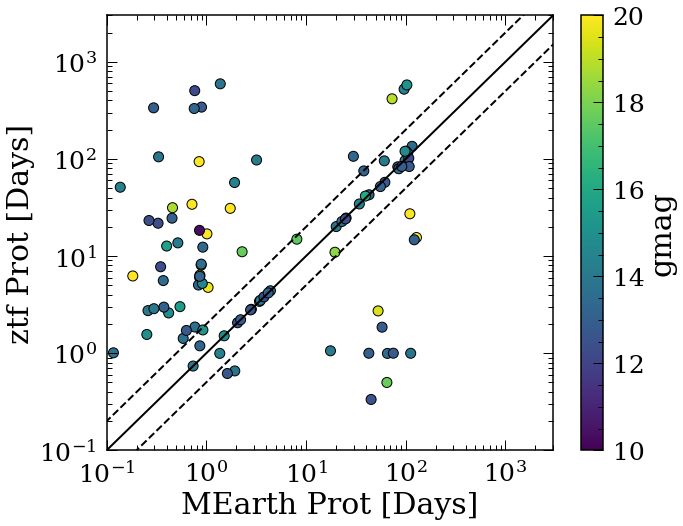

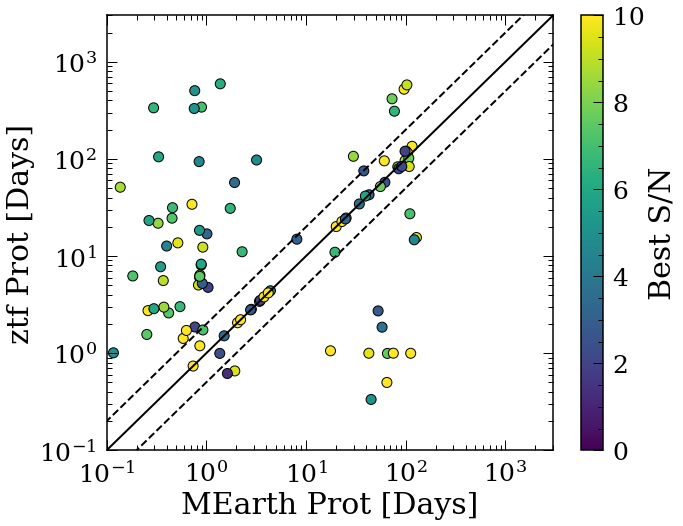

In [851]:
plt.figure(figsize=(10,8))
plt.scatter(df_cm['P'], df_cm['bestprot'], c=df_cm['gmag'], s=100, 
            edgecolor='k', vmin=10, vmax=20)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('MEarth Prot [Days]')
plt.ylabel('ztf Prot [Days]')
plt.plot([0,3000], [0,3000], 'k-')
plt.plot([0,3000], [0,6000], 'k--')
plt.plot([0,6000], [0,3000], 'k--')
plt.xlim([0.1,3000])
plt.ylim([0.1,3000])
cb = plt.colorbar()
cb.set_label('gmag')

plt.figure(figsize=(10,8))
plt.scatter(df_cm['P'], df_cm['bestprot'], c=df_cm['bestSN'], s=100, 
            edgecolor='k',vmin=0,vmax=10)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('MEarth Prot [Days]')
plt.ylabel('ztf Prot [Days]')
plt.plot([0,3000], [0,3000], 'k-')
plt.plot([0,3000], [0,6000], 'k--')
plt.plot([0,6000], [0,3000], 'k--')
plt.xlim([0.1,3000])
plt.ylim([0.1,3000])
cb = plt.colorbar()
cb.set_label('Best S/N')

goodp = (abs(df_cm['bestprot']-df_cm['P'])/df_cm['P'])<0.1

print(sum(goodp), len(df_cm), sum(goodp)/len(df_cm))

In [1015]:


goodp = (abs(df_cm['bestprot']-df_cm['P'])/df_cm['P'])<0.1

print('Best period:', sum(goodp), len(df_cm), sum(goodp)/len(df_cm))


df_cm['overall1'] = (abs(df_cm['prot1']-df_cm['P'])/df_cm['P'])<0.1
df_cm['overall2'] = (abs(df_cm['prot2']-df_cm['P'])/df_cm['P'])<0.1
df_cm['overall3'] = (abs(df_cm['prot3']-df_cm['P'])/df_cm['P'])<0.1
df_cm['overall4'] = (abs(df_cm['prot4']-df_cm['P'])/df_cm['P'])<0.1
df_cm['overall5'] = (abs(df_cm['prot5']-df_cm['P'])/df_cm['P'])<0.1
df_cm['overall6'] = (abs(df_cm['prot6']-df_cm['P'])/df_cm['P'])<0.1
df_cm['overall7'] = (abs(df_cm['prot7']-df_cm['P'])/df_cm['P'])<0.1
goodp = (abs(df_cm['prot1']-df_cm['P'])/df_cm['P'])<0.1
goodp = goodp|((abs(df_cm['prot2']-df_cm['P'])/df_cm['P'])<0.1)
goodp = goodp|((abs(df_cm['prot3']-df_cm['P'])/df_cm['P'])<0.1)
goodp = goodp|((abs(df_cm['prot4']-df_cm['P'])/df_cm['P'])<0.1)
goodp = goodp|((abs(df_cm['prot5']-df_cm['P'])/df_cm['P'])<0.1)
goodp = goodp|((abs(df_cm['prot6']-df_cm['P'])/df_cm['P'])<0.1)
goodp = goodp|((abs(df_cm['prot7']-df_cm['P'])/df_cm['P'])<0.1)
df_cm['overall'] = goodp
print(sum(df_cm['overall1']),sum(df_cm['overall2']),sum(df_cm['overall3']),
      sum(df_cm['overall4']),sum(df_cm['overall5']),sum(df_cm['overall6']),
     sum(df_cm['overall7']))
print(sum(goodp), sum(goodp)/len(df_cm))



bestid = df_cm['2MASS'].values
bestprot = np.zeros(len(df_cm))
maxprot = np.zeros(len(df_cm))
same2 = np.zeros(len(df_cm))
pstd = np.zeros(len(df_cm))

for i in trange(len(bestid)):
    prots_sing = df_cm.loc[df_cm['2MASS']==bestid[i]]
    oneprot = prots_sing[['prot1','prot2','prot3','prot4','prot5']].dropna(axis=1).values[0]
    maxpowers = prots_sing[['maxpower1','maxpower2','maxpower3','maxpower4','maxpower5']].dropna(axis=1).values[0]
    pstd[i] = np.std(oneprot)/np.mean(oneprot)
    if len(oneprot)<3:
        bestprot[i] = oneprot[maxpowers==max(maxpowers)]
        maxprot[i] = oneprot[maxpowers==max(maxpowers)]
        same2[i]=0
        continue
    oneprot_test = np.append(oneprot, [oneprot[0]])
    smalldiff = min(abs(np.diff(oneprot_test)))
    m2 = (abs(np.diff(oneprot_test))==min(abs(np.diff(oneprot_test))))
    m2 = np.append(m2,[False])
    if smalldiff/oneprot_test[m2]<0.05:
        bestprot[i]=oneprot_test[m2]
        same2[i]=1
    else:
        bestprot[i] = oneprot[maxpowers==max(maxpowers)]
        same2[i]=0
    maxprot[i] = oneprot[maxpowers==max(maxpowers)]
    
    
df_cm['bestprot'] = bestprot
df_cm['bestSN'] = bestsn    
df_cm['Prot_std'] = pstd

Best period: 28 99 0.2828282828282828
22 17 18 18 4 0 0
38 0.3838383838383838


100%|██████████| 99/99 [00:00<00:00, 335.47it/s]


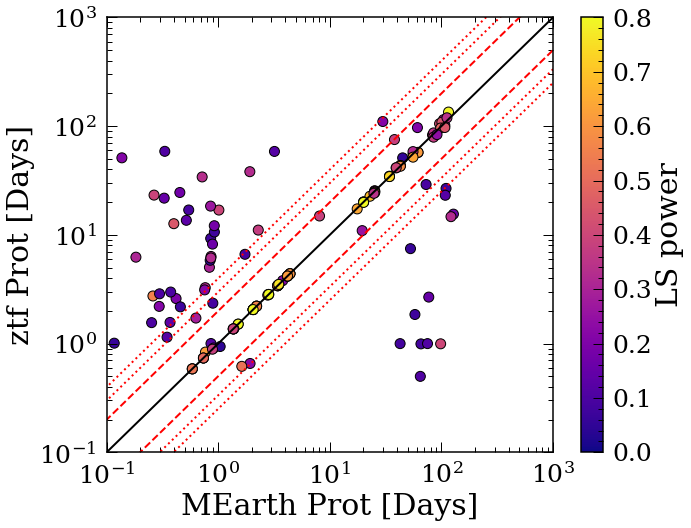

In [1016]:
import matplotlib.colors
def getcolor(vrange,cm=plt.cm.get_cmap('jet')):
    cmap = cm
    norm = matplotlib.colors.Normalize(vmin=min(vrange), vmax=max(vrange))
    return [cmap(norm(i)) for i in vrange]
colors = getcolor(np.array([1,2,3,4,5,6]),plt.cm.get_cmap('plasma'))

cmap = plt.cm.get_cmap('plasma')
plt.figure(figsize=(10,8))
prots_pag = df_cm.loc[df_cm['overall']==0]
plt.scatter(prots_pag['P'], prots_pag['bestprot'], c=prots_pag['maxpower1'], s=100, 
                edgecolor='k', cmap=cmap, vmin=0, vmax=0.8)

for i in range(1,6):
    prots_pag = df_cm.loc[df_cm['overall'+str(i)]==1]
    plt.scatter(prots_pag['P'], prots_pag['prot'+str(i)], 
                c=prots_pag['maxpower'+str(i)], s=100, 
                edgecolor='k', label='At least one season agrees', 
                cmap=cmap, vmin=0, vmax=0.8)
    
plt.xscale('log')
plt.yscale('log')
plt.xlabel('MEarth Prot [Days]')
plt.ylabel('ztf Prot [Days]')
plt.plot([0,1000], [0,1000], 'k-')
plt.plot([0,3000], [0,6000], 'r--')
plt.plot([0,6000], [0,3000], 'r--')
plt.plot([0,9000], [0,3000], 'r:')
plt.plot([0,12000], [0,3000], 'r:')
plt.plot([0,3000],[0,9000], 'r:')
plt.plot([0,3000], [0,12000], 'r:')
plt.xlim([0.1,1000])
plt.ylim([0.1,1000])

cb = plt.colorbar()
cb.set_label('LS power')

In [1017]:
df_cm_2 = pd.merge(df_cm, eyecheck, left_on='2MASS', right_on='2MASS', how='left')

poss_numb = np.zeros(len(df_cm_2))
posses = df_cm_2['poss'].values
overallcheck = df_cm_2['overall'].values

for i in range(len(df_cm_2)):
    if overallcheck[i]==1:
        poss_numb[i] = 1
    elif posses[i]=='y':
        poss_numb[i] = 2
    elif posses[i]=='imp':
        poss_numb[i] = 3
    elif posses[i]=='ztf':
        poss_numb[i] = 4
    elif posses[i]=='?':
        poss_numb[i] = 5
    else:
        poss_numb[i] = 6
df_cm['poss_numb'] = poss_numb


df_cm['overall1'] = (abs(df_cm['prot1']-df_cm['P'])/df_cm['P'])<0.1
df_cm['overall2'] = ((abs(df_cm['prot2']-df_cm['P'])/df_cm['P'])<0.1)&(df_cm['overall1']!=1)
df_cm['overall3'] = ((abs(df_cm['prot3']-df_cm['P'])/df_cm['P'])<0.1)&(df_cm['overall1']!=1)&(df_cm['overall2']!=1)
df_cm['overall4'] = ((abs(df_cm['prot4']-df_cm['P'])/df_cm['P'])<0.1)&(df_cm['overall1']!=1)&(df_cm['overall2']!=1)&(df_cm['overall3']!=1)
df_cm['overall5'] = ((abs(df_cm['prot5']-df_cm['P'])/df_cm['P'])<0.1)&(df_cm['overall1']!=1)&(df_cm['overall2']!=1)&(df_cm['overall3']!=1)&(df_cm['overall4']!=1)

goodp = (abs(df_cm['prot1']-df_cm['P'])/df_cm['P'])<0.1
goodp = goodp|((abs(df_cm['prot2']-df_cm['P'])/df_cm['P'])<0.1)
goodp = goodp|((abs(df_cm['prot3']-df_cm['P'])/df_cm['P'])<0.1)
goodp = goodp|((abs(df_cm['prot4']-df_cm['P'])/df_cm['P'])<0.1)
goodp = goodp|((abs(df_cm['prot5']-df_cm['P'])/df_cm['P'])<0.1)
prots_raw['overall'] = goodp
print(sum(df_cm['overall1']),sum(df_cm['overall2']),sum(df_cm['overall3']),
      sum(df_cm['overall4']),sum(df_cm['overall5']))
print(sum(goodp), sum(goodp)/len(prots_raw))



22 9 2 4 1
38 0.3838383838383838


In [1018]:
df_cm = df_cm.reset_index(drop=True)
prot_ag = np.zeros(len(df_cm))
count = 0
for i in range(len(df_cm)):
    df_sing = df_cm.iloc[i]
    for j in range(1,6):
        if df_sing['overall'+str(j)]==1:
            prot_ag[i] = df_sing['prot'+str(j)]
            count = count+1
            break
        prot_ag[i] = df_sing['bestprot']
        
            
df_cm['prot_season'] = prot_ag


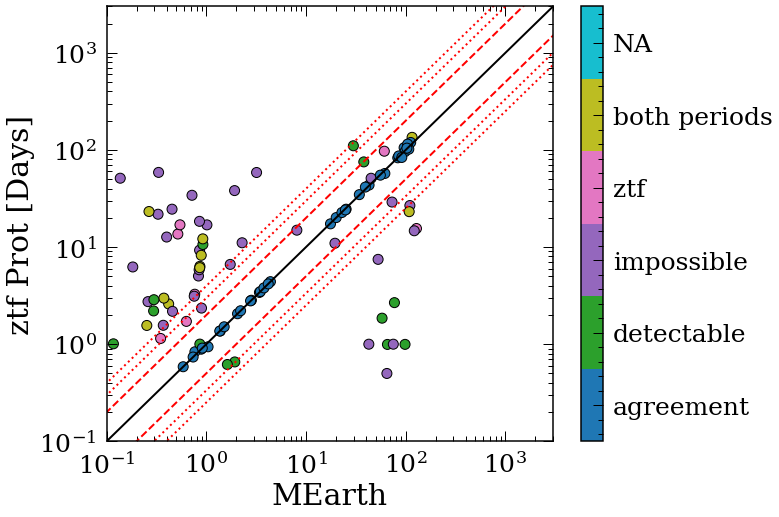

In [1019]:
plt.figure(figsize=(10,8))
plt.scatter(df_cm['P'], df_cm['prot_season'], c=df_cm['poss_numb'], s=100, 
            edgecolor='k', vmin=0.5, vmax=6.5, cmap=plt.cm.get_cmap('tab10',6))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('MEarth')
plt.ylabel('ztf Prot [Days]')
plt.plot([0,3000], [0,3000], 'k-')
plt.plot([0,3000], [0,6000], 'r--')
plt.plot([0,6000], [0,3000], 'r--')
plt.plot([0,9000], [0,3000], 'r:')
plt.plot([0,12000], [0,3000], 'r:')
plt.plot([0,3000],[0,9000], 'r:')
plt.plot([0,3000], [0,12000], 'r:')
plt.xlim([0.1,3000])
plt.ylim([0.1,3000])
cb = plt.colorbar(ticks=[1, 2, 3, 4, 5, 6])
cb.set_ticklabels(['agreement', 'detectable', 'impossible', 'ztf', 'both periods', 'NA'])




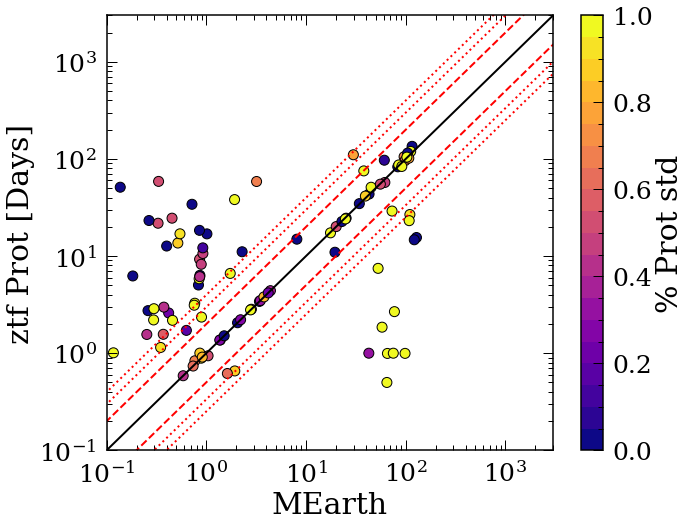

In [1023]:
plt.figure(figsize=(10,8))
plt.scatter(df_cm['P'], df_cm['prot_season'], c=df_cm['Prot_std'], s=100, 
            edgecolor='k', vmin=0, vmax=1, cmap=plt.cm.get_cmap('plasma',20))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('MEarth')
plt.ylabel('ztf Prot [Days]')
plt.plot([0,3000], [0,3000], 'k-')
plt.plot([0,3000], [0,6000], 'r--')
plt.plot([0,6000], [0,3000], 'r--')
plt.plot([0,9000], [0,3000], 'r:')
plt.plot([0,12000], [0,3000], 'r:')
plt.plot([0,3000],[0,9000], 'r:')
plt.plot([0,3000], [0,12000], 'r:')
plt.xlim([0.1,3000])
plt.ylim([0.1,3000])
cb = plt.colorbar()
cb.set_label('% Prot std')



7.57503590414002e-05


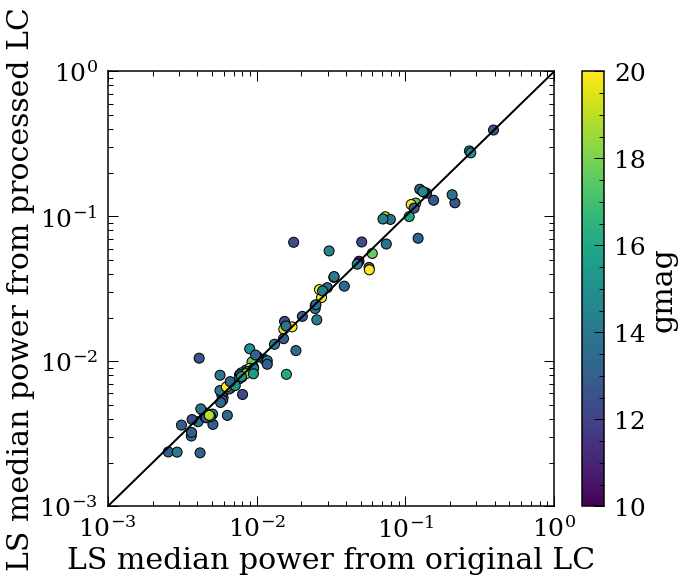

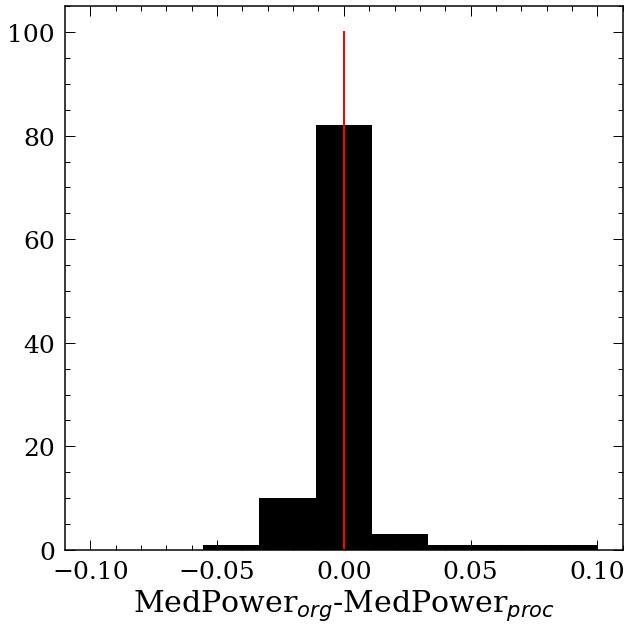

In [817]:
plt.figure(figsize=(10,8))
plt.scatter(df_cm['medpower_org'], df_cm['medpower1'],c=df_cm['gmag'], s=100, 
            edgecolor='k',vmin=10,vmax=20)
plt.plot([0,1], [0,1], 'k-')
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e-3,1])
plt.ylim([1e-3,1])
plt.xlabel('LS median power from original LC')
plt.ylabel('LS median power from processed LC')
cb = plt.colorbar()
cb.set_label('gmag')

plt.figure()
plt.hist(df_cm['medpower_org']-df_cm['medpower1'],bins=np.linspace(-0.1,0.1,10),
        color='k');
plt.plot([0,0],[0,100],'r-')
plt.xlabel('MedPower$_{org}$-MedPower$_{proc}$')

print(np.median(df_cm['medpower_org']-df_cm['medpower1']))

# Process for more stars

In [67]:
prots_raw = pd.read_table('ztfProts_split_newrun', delimiter=',')



In [75]:
pwd

'/data/users/llu'

In [68]:
for i in range(1,8):
    prots_raw['SN'+str(i)]=prots_raw['maxpower'+str(i)]/prots_raw['medpower'+str(i)]

    bestid = prots_raw['id'].values
bestprot = np.zeros(len(prots_raw))
bestsn = np.zeros(len(prots_raw))

for i in trange(len(bestid)):
    prots_sing = prots_raw.iloc[i]
    allsn = np.array([prots_sing['SN'+str(j)] for j in range(1,8)])
    #allsn = np.array([prots_sing['medpower'+str(j)] for j in range(1,8)])
    allsn = allsn[allsn==allsn]
    bestprot[i] = prots_sing['prot'+str(np.argmax(allsn)+1)]
    #bestprot[i] = prots_sing['prot'+str(np.argmin(allsn)+1)]
    bestsn[i] = min(allsn)
prots_raw['bestprot'] = bestprot
prots_raw['bestSN'] = bestsn

df_cm = pd.merge(radec[['2MASS','Prot','Gmag']], prots_raw, left_on='2MASS', right_on='id', how='inner')




100%|██████████| 336/336 [00:00<00:00, 7697.44it/s]


86 336 0.25595238095238093


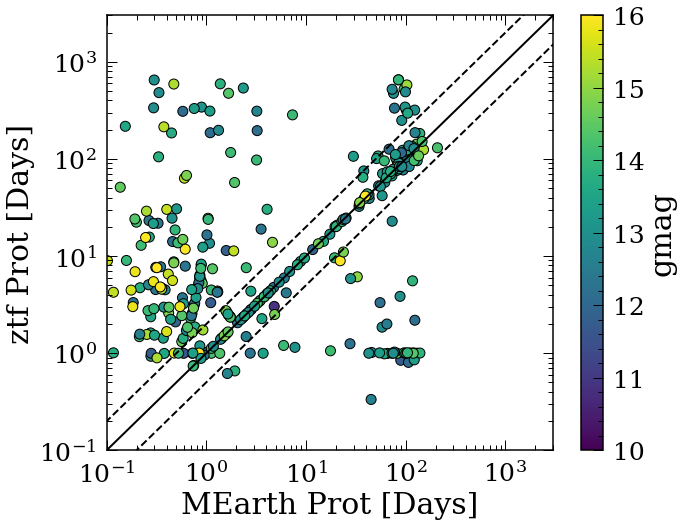

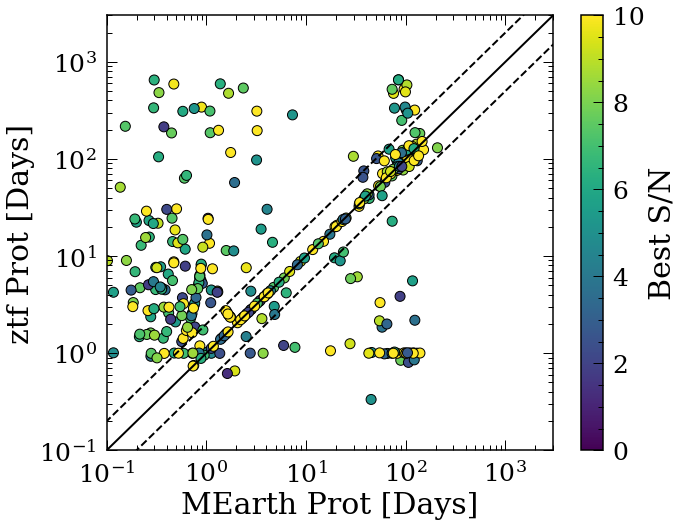

In [69]:
plt.figure(figsize=(10,8))
plt.scatter(df_cm['Prot'], df_cm['bestprot'], c=df_cm['Gmag'], s=100, 
            edgecolor='k', vmin=10, vmax=16)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('MEarth Prot [Days]')
plt.ylabel('ztf Prot [Days]')
plt.plot([0,3000], [0,3000], 'k-')
plt.plot([0,3000], [0,6000], 'k--')
plt.plot([0,6000], [0,3000], 'k--')
plt.xlim([0.1,3000])
plt.ylim([0.1,3000])
cb = plt.colorbar()
cb.set_label('gmag')

plt.figure(figsize=(10,8))
plt.scatter(df_cm['Prot'], df_cm['bestprot'], c=df_cm['bestSN'], s=100, 
            edgecolor='k',vmin=0,vmax=10)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('MEarth Prot [Days]')
plt.ylabel('ztf Prot [Days]')
plt.plot([0,3000], [0,3000], 'k-')
plt.plot([0,3000], [0,6000], 'k--')
plt.plot([0,6000], [0,3000], 'k--')
plt.xlim([0.1,3000])
plt.ylim([0.1,3000])
cb = plt.colorbar()
cb.set_label('Best S/N')

goodp = (abs(df_cm['bestprot']-df_cm['Prot'])/df_cm['Prot'])<0.1

print(sum(goodp), len(df_cm), sum(goodp)/len(df_cm))

In [70]:
goodids = df_cm[goodp]['2MASS'].values

In [71]:


goodp = (abs(df_cm['bestprot']-df_cm['Prot'])/df_cm['Prot'])<0.1

print('Best period:', sum(goodp), len(df_cm), sum(goodp)/len(df_cm))


df_cm['overall1'] = (abs(df_cm['prot1']-df_cm['Prot'])/df_cm['Prot'])<0.1
df_cm['overall2'] = (abs(df_cm['prot2']-df_cm['Prot'])/df_cm['Prot'])<0.1
df_cm['overall3'] = (abs(df_cm['prot3']-df_cm['Prot'])/df_cm['Prot'])<0.1
df_cm['overall4'] = (abs(df_cm['prot4']-df_cm['Prot'])/df_cm['Prot'])<0.1
df_cm['overall5'] = (abs(df_cm['prot5']-df_cm['Prot'])/df_cm['Prot'])<0.1
df_cm['overall6'] = (abs(df_cm['prot6']-df_cm['Prot'])/df_cm['Prot'])<0.1
df_cm['overall7'] = (abs(df_cm['prot7']-df_cm['Prot'])/df_cm['Prot'])<0.1
goodp = (abs(df_cm['prot1']-df_cm['Prot'])/df_cm['Prot'])<0.1
goodp = goodp|((abs(df_cm['prot2']-df_cm['Prot'])/df_cm['Prot'])<0.1)
goodp = goodp|((abs(df_cm['prot3']-df_cm['Prot'])/df_cm['Prot'])<0.1)
goodp = goodp|((abs(df_cm['prot4']-df_cm['Prot'])/df_cm['Prot'])<0.1)
goodp = goodp|((abs(df_cm['prot5']-df_cm['Prot'])/df_cm['Prot'])<0.1)
goodp = goodp|((abs(df_cm['prot6']-df_cm['Prot'])/df_cm['Prot'])<0.1)
goodp = goodp|((abs(df_cm['prot7']-df_cm['Prot'])/df_cm['Prot'])<0.1)
df_cm['overall'] = goodp
print(sum(df_cm['overall1']),sum(df_cm['overall2']),sum(df_cm['overall3']),
      sum(df_cm['overall4']),sum(df_cm['overall5']),sum(df_cm['overall6']),
     sum(df_cm['overall7']))
print(sum(goodp), sum(goodp)/len(df_cm))



bestid = df_cm['2MASS'].values
bestprot = np.zeros(len(df_cm))
maxprot = np.zeros(len(df_cm))
same2 = np.zeros(len(df_cm))
pstd = np.zeros(len(df_cm))

for i in trange(len(bestid)):
    prots_sing = df_cm.loc[df_cm['2MASS']==bestid[i]]
    oneprot = prots_sing[['prot1','prot2','prot3','prot4','prot5']].dropna(axis=1).values[0]
    maxpowers = prots_sing[['maxpower1','maxpower2','maxpower3','maxpower4','maxpower5']].dropna(axis=1).values[0]
    pstd[i] = np.std(oneprot)/np.mean(oneprot)
    if len(oneprot)<3:
        bestprot[i] = oneprot[maxpowers==max(maxpowers)]
        maxprot[i] = oneprot[maxpowers==max(maxpowers)]
        same2[i]=0
        continue
    oneprot_test = np.append(oneprot, [oneprot[0]])
    smalldiff = min(abs(np.diff(oneprot_test)))
    m2 = (abs(np.diff(oneprot_test))==min(abs(np.diff(oneprot_test))))
    m2 = np.append(m2,[False])
    if smalldiff/oneprot_test[m2]<0.05:
        bestprot[i]=oneprot_test[m2]
        same2[i]=1
    else:
        bestprot[i] = oneprot[maxpowers==max(maxpowers)]
        same2[i]=0
    maxprot[i] = oneprot[maxpowers==max(maxpowers)]
    
    
df_cm['bestprot'] = bestprot
df_cm['bestSN'] = bestsn    
df_cm['Prot_std'] = pstd


agreem = abs(df_cm['bestprot']-df_cm['Prot'])/df_cm['Prot']<0.1
multiseason = same2==1
agreem_2 = abs(df_cm['bestprot'][multiseason]-df_cm['Prot'][multiseason])/df_cm['Prot'][multiseason]<0.1
agreem_3 = abs(df_cm['bestprot'][~multiseason]-df_cm['Prot'][~multiseason])/df_cm['Prot'][~multiseason]<0.1


print('best agreeing:', sum(agreem))
print('at least 2 agreeing:', sum(agreem_2), sum(multiseason))
print('best agreeing:', sum(agreem_3), len(multiseason)-sum(multiseason))


Best period: 86 336 0.25595238095238093
78 54 65 63 25 0 0
130 0.3869047619047619


100%|██████████| 336/336 [00:00<00:00, 349.50it/s]

best agreeing: 91
at least 2 agreeing: 58 149
best agreeing: 33 187


In [72]:
58/147

0.3945578231292517

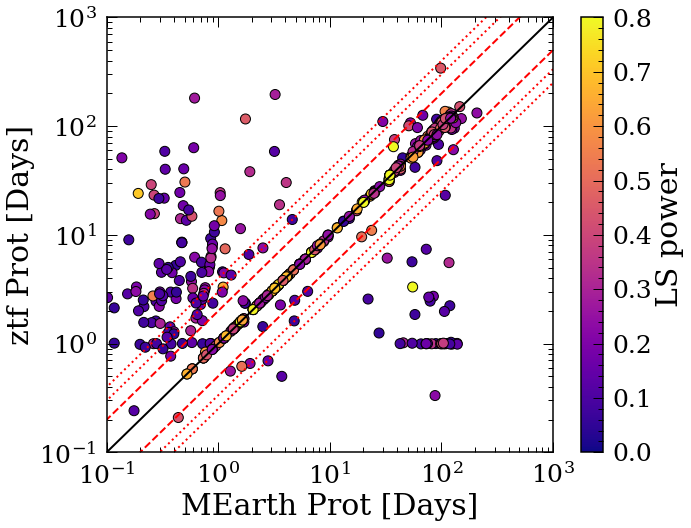

In [73]:
import matplotlib.colors
def getcolor(vrange,cm=plt.cm.get_cmap('jet')):
    cmap = cm
    norm = matplotlib.colors.Normalize(vmin=min(vrange), vmax=max(vrange))
    return [cmap(norm(i)) for i in vrange]
colors = getcolor(np.array([1,2,3,4,5,6]),plt.cm.get_cmap('plasma'))

cmap = plt.cm.get_cmap('plasma')
plt.figure(figsize=(10,8))
prots_pag = df_cm.loc[df_cm['overall']==0]
plt.scatter(prots_pag['Prot'], prots_pag['bestprot'], c=prots_pag['maxpower1'], s=100, 
                edgecolor='k', cmap=cmap, vmin=0, vmax=0.8)

for i in range(1,6):
    prots_pag = df_cm.loc[df_cm['overall'+str(i)]==1]
    plt.scatter(prots_pag['Prot'], prots_pag['prot'+str(i)], 
                c=prots_pag['maxpower'+str(i)], s=100, 
                edgecolor='k', label='At least one season agrees', 
                cmap=cmap, vmin=0, vmax=0.8)
    
plt.xscale('log')
plt.yscale('log')
plt.xlabel('MEarth Prot [Days]')
plt.ylabel('ztf Prot [Days]')
plt.plot([0,1000], [0,1000], 'k-')
plt.plot([0,3000], [0,6000], 'r--')
plt.plot([0,6000], [0,3000], 'r--')
plt.plot([0,9000], [0,3000], 'r:')
plt.plot([0,12000], [0,3000], 'r:')
plt.plot([0,3000],[0,9000], 'r:')
plt.plot([0,3000], [0,12000], 'r:')
plt.xlim([0.1,1000])
plt.ylim([0.1,1000])

cb = plt.colorbar()
cb.set_label('LS power')

5.8533161211700175e-05


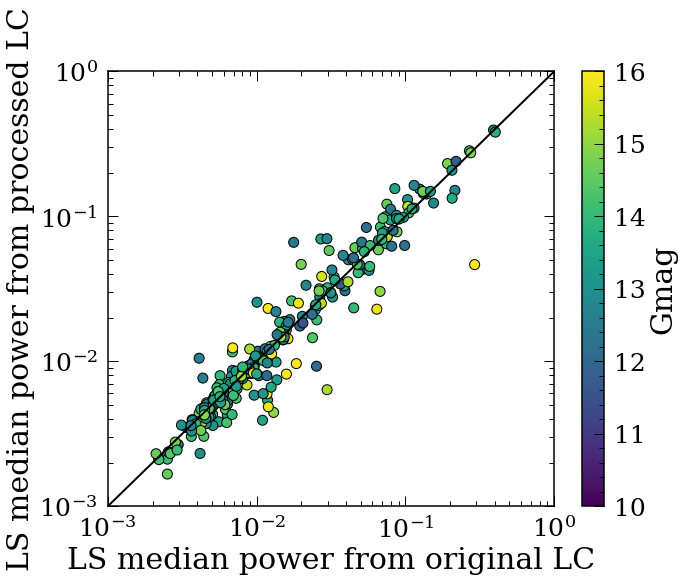

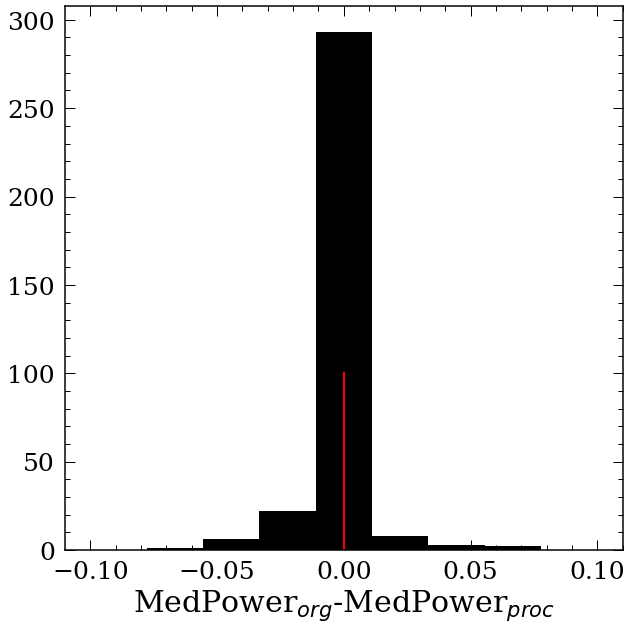

In [74]:
plt.figure(figsize=(10,8))
plt.scatter(df_cm['medpower_org'], df_cm['medpower1'],c=df_cm['Gmag'], s=100, 
            edgecolor='k',vmin=10,vmax=16)
plt.plot([0,1], [0,1], 'k-')
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e-3,1])
plt.ylim([1e-3,1])
plt.xlabel('LS median power from original LC')
plt.ylabel('LS median power from processed LC')
cb = plt.colorbar()
cb.set_label('Gmag')

plt.figure()
plt.hist(df_cm['medpower_org']-df_cm['medpower1'],bins=np.linspace(-0.1,0.1,10),
        color='k');
plt.plot([0,0],[0,100],'r-')
plt.xlabel('MedPower$_{org}$-MedPower$_{proc}$')

print(np.median(df_cm['medpower_org']-df_cm['medpower1']))